# **Import**

In [ ]:
import warnings

warnings.filterwarnings('ignore')

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from statistics import mode, StatisticsError

# **B.csv**

In [ ]:
cd /content/drive/MyDrive/[Projects]/Dacon/운수종사자 인지적 특성 데이터를 활용한 교통사고 위험 예측 AI 경진대회/Data

/content/drive/MyDrive/[Projects]/Dacon/운수종사자 인지적 특성 데이터를 활용한 교통사고 위험 예측 AI 경진대회/Data


In [ ]:
train_b = pd.read_csv('./train_b.csv')
train_b.head()

,Test_id,Test_x,Label,Test_y,PrimaryKey,Age,TestDate,B1-1,B1-2,B1-3,...,B9-2,B9-3,B9-4,B9-5,B10-1,B10-2,B10-3,B10-4,B10-5,B10-6
0,0xD5BB9FA4D3BC42EE494BD670F004564CB04A0DF8F819...,B,0,B,0xD5BB9FA4D3BC42EE494BD670F004564CB04A0DF8F819...,60b,201912,"1,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1","0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0","2,4,4,2,4,4,2,2,4,2,2,4,2,4,4,2",...,0,1,34,0,20,0,2,58,0,20
1,0x689BA0A725996D44C81AF62BA981E35E1CAC54E2D85A...,B,0,B,0x689BA0A725996D44C81AF62BA981E35E1CAC54E2D85A...,60b,202002,"1,1,1,1,1,1,1,1,1,2,1,1,1,1,1,1","0,0,0.7208771,0,0.6820285,0,0.6655249,0,0.6622...","4,4,1,4,1,4,1,4,1,1,4,1,4,4,1,1",...,0,0,35,0,20,0,1,59,3,20
2,0x52908018D663ECD95A5B3F53822F28DA755E7F4A3453...,B,0,B,0x52908018D663ECD95A5B3F53822F28DA755E7F4A3453...,60b,202205,"1,1,1,2,1,1,2,1,2,1,1,1,1,1,1,1","0.6172074,0,0,0.5502462,0,0,0.6004377,1.117857...","1,4,4,1,4,4,1,1,4,1,1,4,1,4,4,1",...,0,1,34,1,20,0,1,59,2,18
3,0x8301C9E89A886F3461F2513473B6DFA6CCF3D2A90FF9...,B,0,B,0x8301C9E89A886F3461F2513473B6DFA6CCF3D2A90FF9...,70b,202210,"1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1","0,0,0.947294,0,0.7391879,0,0.5613896,0,0.52969...","4,4,1,4,1,4,1,4,1,2,4,1,4,4,1,1",...,0,0,35,0,18,2,0,60,5,19
4,0x800A6AE66459B67FB0A249B0CF8EA39E19B014A920BF...,B,0,B,0x800A6AE66459B67FB0A249B0CF8EA39E19B014A920BF...,70a,202103,"1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1","0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0","2,4,4,4,2,4,2,4,2,2,4,4,2,2,2,4",...,0,2,33,0,20,0,0,60,0,19


In [ ]:
train_b.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297526 entries, 0 to 297525
Data columns (total 33 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   Test_id     297526 non-null  object
 1   Test_x      297526 non-null  object
 2   Label       297526 non-null  int64 
 3   Test_y      297526 non-null  object
 4   PrimaryKey  297526 non-null  object
 5   Age         297526 non-null  object
 6   TestDate    297526 non-null  int64 
 7   B1-1        297517 non-null  object
 8   B1-2        297517 non-null  object
 9   B1-3        297517 non-null  object
 10  B2-1        297523 non-null  object
 11  B2-2        297523 non-null  object
 12  B2-3        297523 non-null  object
 13  B3-1        297523 non-null  object
 14  B3-2        297523 non-null  object
 15  B4-1        297523 non-null  object
 16  B4-2        297523 non-null  object
 17  B5-1        297523 non-null  object
 18  B5-2        297523 non-null  object
 19  B6          297523 non-

In [ ]:
# Label
len(train_b[train_b['Label'] == 0]), len(train_b[train_b['Label'] == 1])

(284936, 12590)

## **Age**

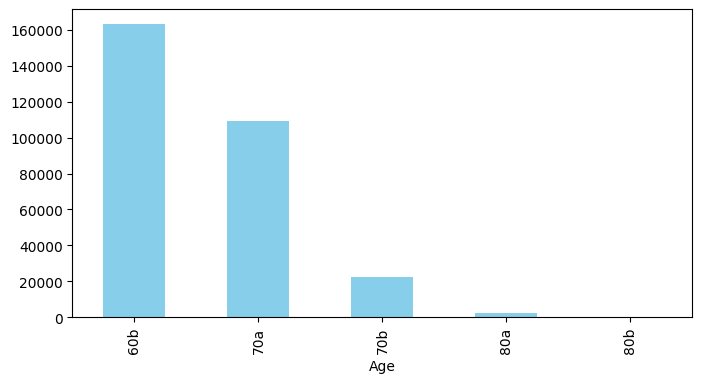

In [ ]:
# Age - 60대 이상 고령은 거의 없음
age_count = train_b['Age'].value_counts().sort_index()

plt.figure(figsize=(8, 4))

age_count.plot(kind='bar', color='skyblue')
plt.show()

<Figure size 800x400 with 0 Axes>

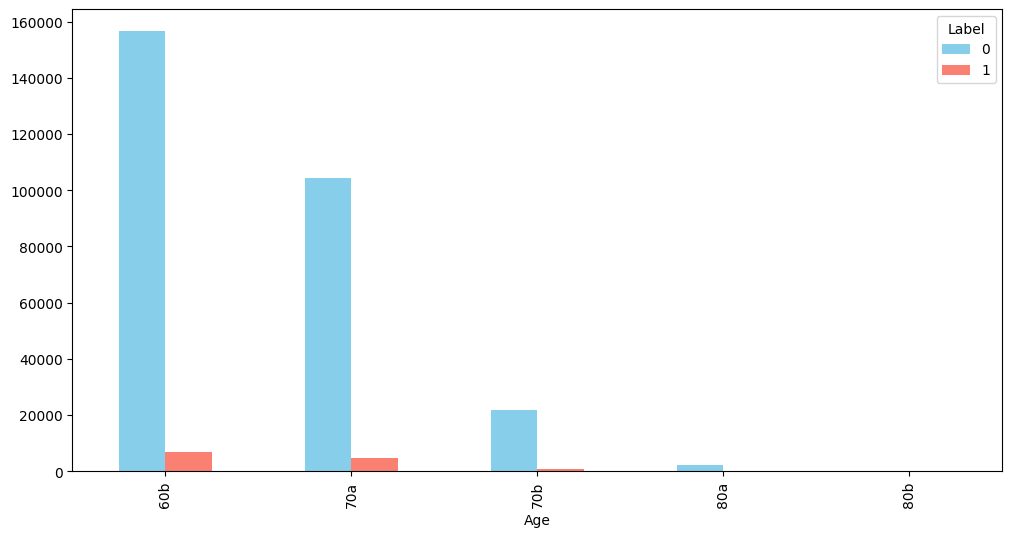

In [ ]:
# Age - Label
# 전체 분포와 비슷한 분포를 가지는 것으로 보임
grouped_age_label = train_b.groupby(['Age', 'Label']).size().unstack(fill_value=0)

plt.figure(figsize=(8, 4))

grouped_age_label.plot(kind="bar", figsize=(12,6), color=["skyblue","salmon"])
plt.show()

<Figure size 800x400 with 0 Axes>

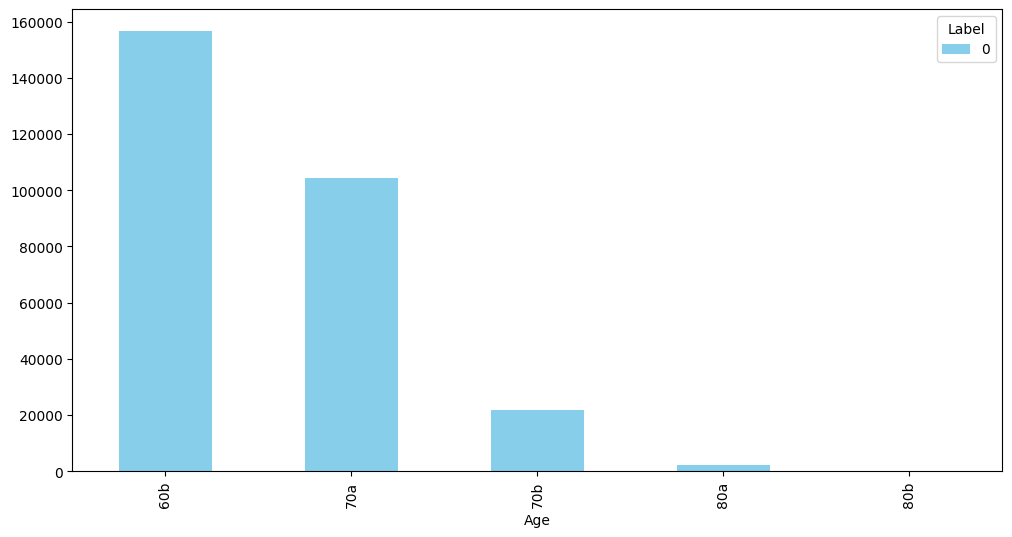

In [ ]:
# Age - Label(0)
# Label -> 0 인 데이터가 매우 많기 때문에 전체 분포와 비슷함
grouped_age_label = train_b[train_b['Label'] == 0].groupby(['Age', 'Label']).size().unstack(fill_value=0)

plt.figure(figsize=(8, 4))

grouped_age_label.plot(kind="bar", figsize=(12,6), color=["skyblue","salmon"])
plt.show()

<Figure size 800x400 with 0 Axes>

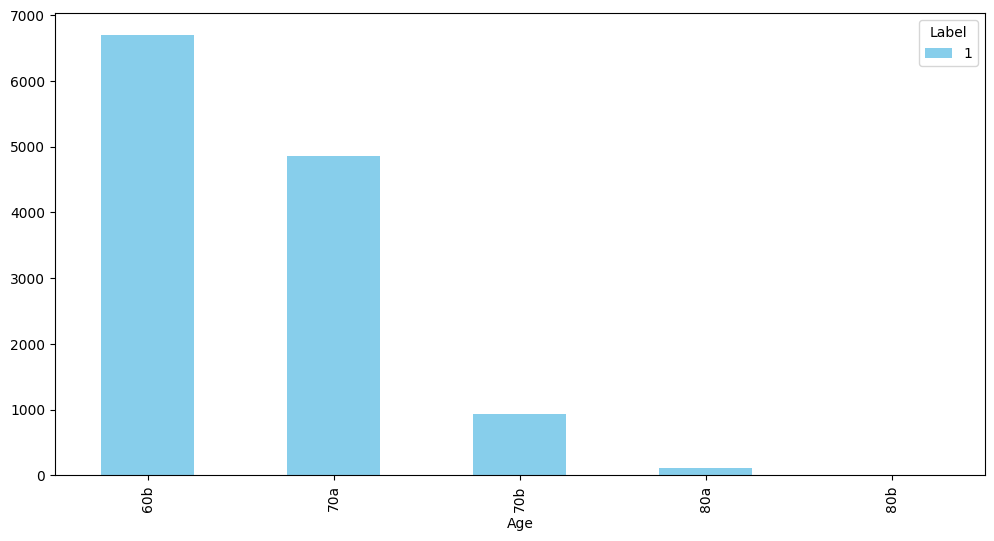

In [ ]:
# Age - Label(1)
# 연령대가 높아질수록 증가하는 경향
# 특히 60대에서 폭발적으로 증가함
grouped_age_label = train_b[train_b['Label'] == 1].groupby(['Age', 'Label']).size().unstack(fill_value=0)

plt.figure(figsize=(8, 4))

grouped_age_label.plot(kind="bar", figsize=(12,6), color=["skyblue","salmon"])
plt.show()

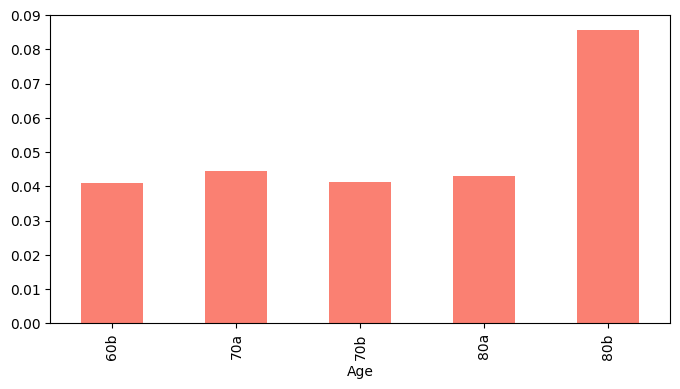

In [ ]:
# 각 연령대 응시자 수 별 Label = 1 비율
# 일단 연령대가 60대에 접어들면 위험군에 속할 확률 ↑
age_label_ratio = train_b.groupby("Age")["Label"].mean()

plt.figure(figsize=(8, 4))
age_label_ratio.plot(kind="bar", color="salmon")
plt.show()

## **TimeDate**

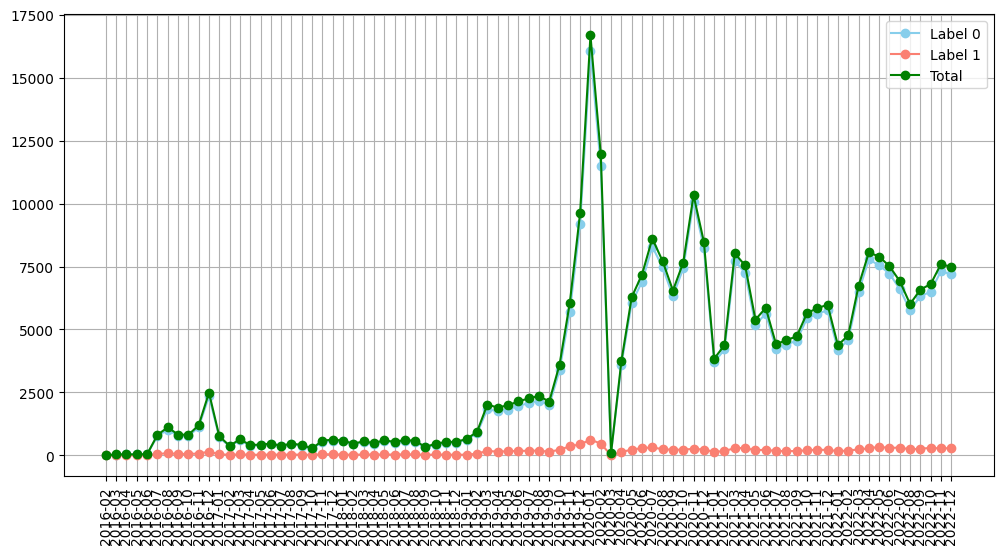

In [ ]:
# Count(Total, Label(0), Label(1)) - TimeDate
train_b['TestDate'] = pd.to_datetime(train_b['TestDate'].astype(str), format='%Y%m')
train_b['TestMonth'] = train_b['TestDate'].dt.to_period('M')

month_label_counts = train_b.groupby(['TestMonth','Label']).size().unstack(fill_value=0)

month_label_counts['Total'] = month_label_counts.sum(axis=1)

plt.figure(figsize=(12,6))
plt.plot(month_label_counts.index.astype(str), month_label_counts[0], marker='o', label='Label 0', color='skyblue')
plt.plot(month_label_counts.index.astype(str), month_label_counts[1], marker='o', label='Label 1', color='salmon')
plt.plot(month_label_counts.index.astype(str), month_label_counts['Total'], marker='o', label='Total', color='green')

plt.xticks(rotation=90)
plt.grid(True)
plt.legend()
plt.show()


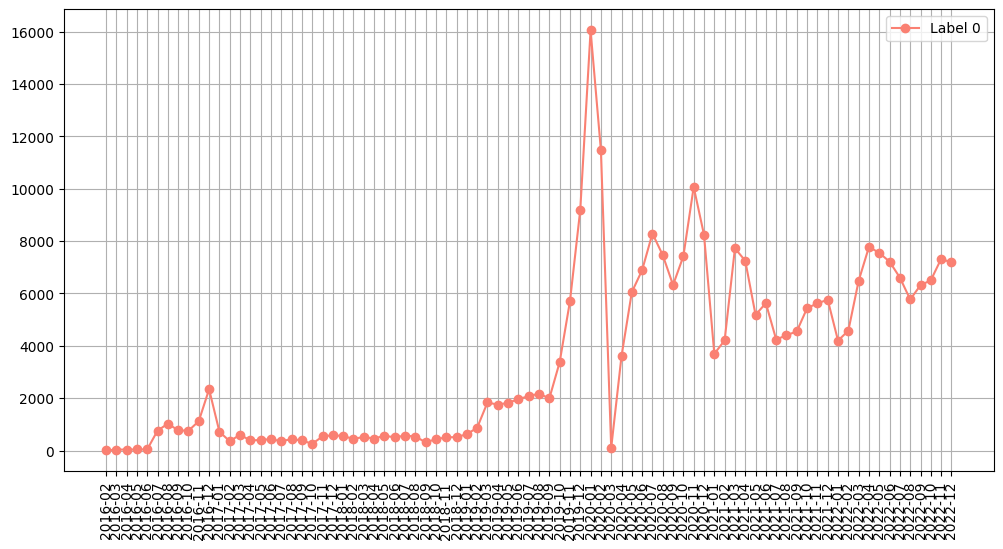

In [ ]:
# Label(0) - TimeDate
# 2020-04에 급격히 줄어드는 것을 제외하면 별다른 특징 X
plt.figure(figsize=(12,6))
plt.plot(month_label_counts.index.astype(str), month_label_counts[0], marker='o', label='Label 0', color='salmon')

plt.xticks(rotation=90)
plt.grid(True)
plt.legend()
plt.show()

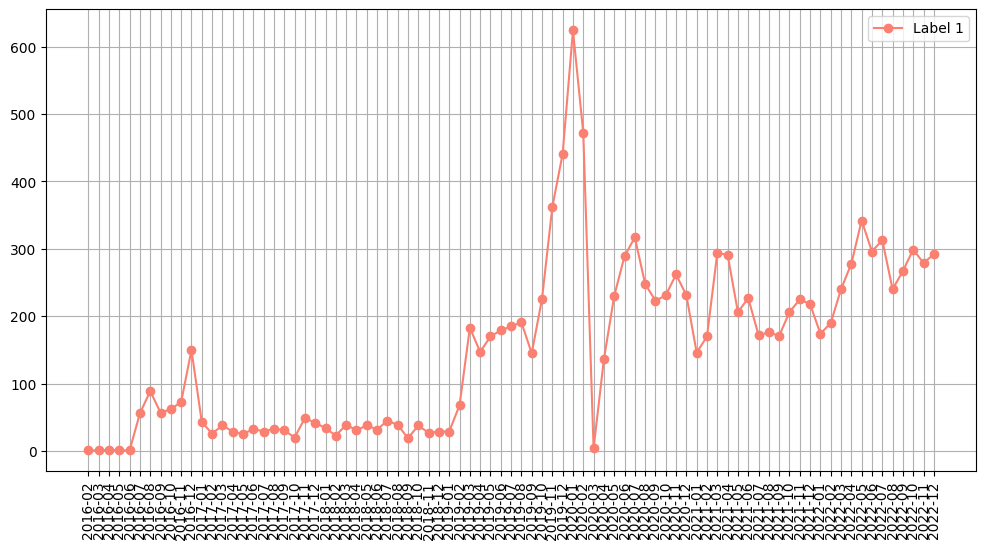

In [ ]:
# Label(1) - TimeDate
# 2020-04까지 줄어드는 추세
plt.figure(figsize=(12,6))
plt.plot(month_label_counts.index.astype(str), month_label_counts[1], marker='o', label='Label 1', color='salmon')

plt.xticks(rotation=90)
plt.grid(True)
plt.legend()
plt.show()

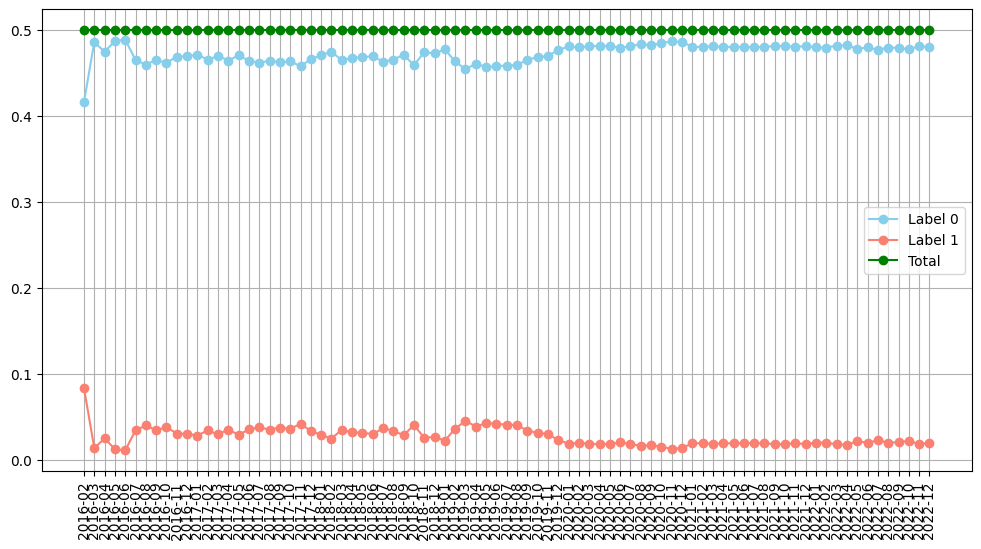

In [ ]:
# 각 월 전체 응시자 대비 Total, Label 0, Label 1 비율
month_label_ratio = month_label_counts.div(month_label_counts.sum(axis=1), axis=0)

plt.figure(figsize=(12,6))
plt.plot(month_label_ratio.index.astype(str), month_label_ratio[0], marker='o', label='Label 0', color='skyblue')
plt.plot(month_label_ratio.index.astype(str), month_label_ratio[1], marker='o', label='Label 1', color='salmon')
plt.plot(month_label_ratio.index.astype(str), month_label_ratio['Total'], marker='o', label='Total', color='green')

plt.xticks(rotation=90)
plt.grid(True)
plt.legend()
plt.show()

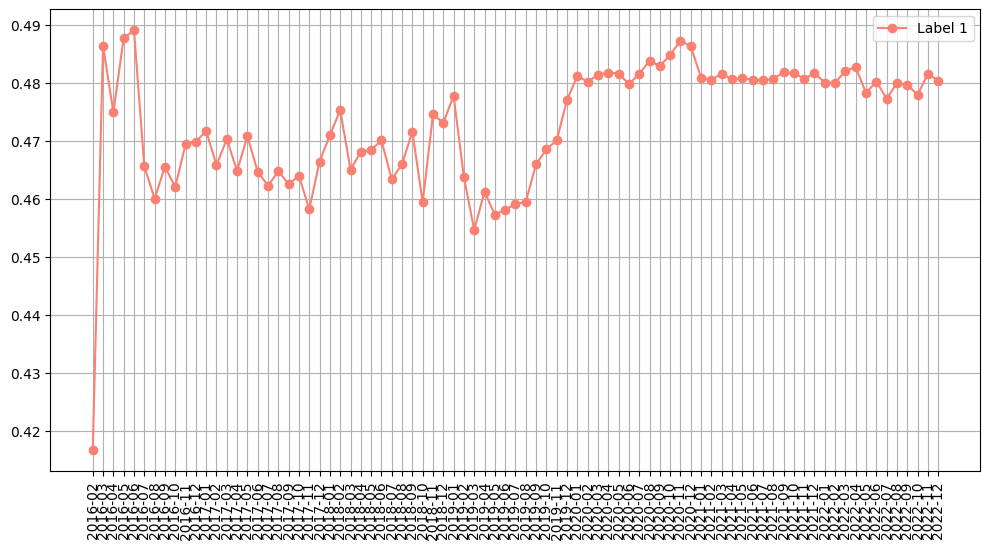

In [ ]:
# 각 월 전체 응시자 대비 Label 0 비율
month_label_ratio = month_label_counts.div(month_label_counts.sum(axis=1), axis=0)

plt.figure(figsize=(12,6))
plt.plot(month_label_ratio.index.astype(str), month_label_ratio[0], marker='o', label='Label 1', color='salmon')

plt.xticks(rotation=90)
plt.grid(True)
plt.legend()
plt.show()

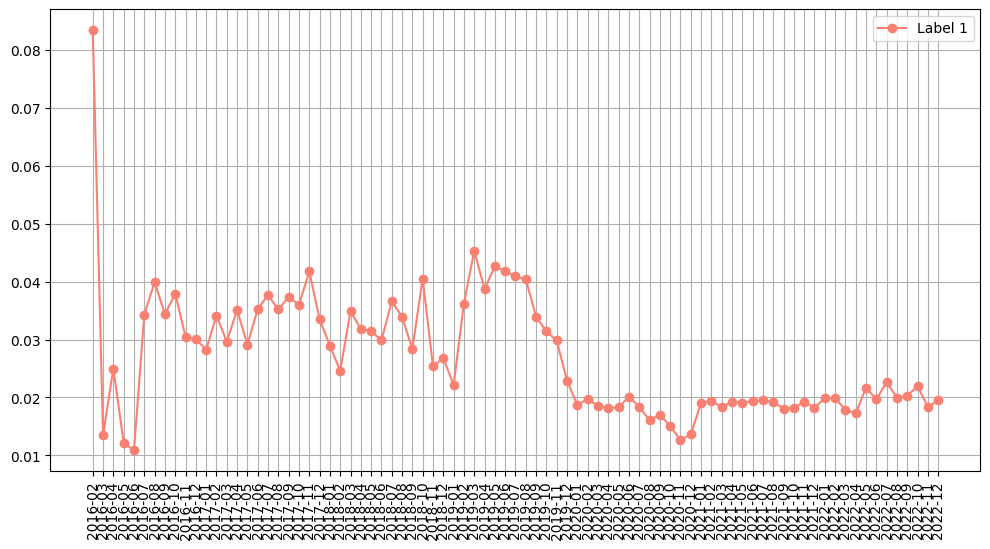

In [ ]:
# 각 월 전체 응시자 대비 Label 1 비율
month_label_ratio = month_label_counts.div(month_label_counts.sum(axis=1), axis=0)

plt.figure(figsize=(12,6))
plt.plot(month_label_ratio.index.astype(str), month_label_ratio[1], marker='o', label='Label 1', color='salmon')

plt.xticks(rotation=90)
plt.grid(True)
plt.legend()
plt.show()

## **B1, B2 Test**

In [ ]:
train_b12 = train_b[['Label', 'Age', 'B1-1', 'B1-2', 'B1-3', 'B2-1', 'B2-2', 'B2-3']]
train_b12.head()

,Label,Age,B1-1,B1-2,B1-3,B2-1,B2-2,B2-3
0,0,60b,"1,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1","0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0","2,4,4,2,4,4,2,2,4,2,2,4,2,4,4,2","1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1","0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0","2,4,4,4,4,2,2,4,4,2,4,2,2,4,2,2"
1,0,60b,"1,1,1,1,1,1,1,1,1,2,1,1,1,1,1,1","0,0,0.7208771,0,0.6820285,0,0.6655249,0,0.6622...","4,4,1,4,1,4,1,4,1,1,4,1,4,4,1,1","1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1","0,0.5170344,0.8711528,0,0.661481,0,0,0.5080906...","4,1,1,4,1,4,4,1,4,4,1,1,1,4,1,4"
2,0,60b,"1,1,1,2,1,1,2,1,2,1,1,1,1,1,1,1","0.6172074,0,0,0.5502462,0,0,0.6004377,1.117857...","1,4,4,1,4,4,1,1,4,1,1,4,1,4,4,1","1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1","0.4669235,0,0,0,0,0.6672208,0.550404,0,0,0.550...","1,4,4,4,4,1,1,4,4,1,4,1,1,4,1,1"
3,0,70b,"1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1","0,0,0.947294,0,0.7391879,0,0.5613896,0,0.52969...","4,4,1,4,1,4,1,4,1,2,4,1,4,4,1,1","1,1,2,1,1,1,1,1,1,1,1,1,1,1,1,1","0,0.6298192,0,0.5285962,0,0,0,0,0.6924804,0.52...","4,1,4,1,4,4,4,4,1,1,1,4,1,1,1,4"
4,0,70a,"1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1","0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0","2,4,4,4,2,4,2,4,2,2,4,4,2,2,2,4","2,2,1,1,2,1,1,1,1,2,1,2,1,1,2,1","0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0","2,4,4,4,4,2,2,4,4,2,4,2,2,4,2,2"


In [ ]:
train_b12.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297526 entries, 0 to 297525
Data columns (total 8 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   Label   297526 non-null  int64 
 1   Age     297526 non-null  object
 2   B1-1    297517 non-null  object
 3   B1-2    297517 non-null  object
 4   B1-3    297517 non-null  object
 5   B2-1    297523 non-null  object
 6   B2-2    297523 non-null  object
 7   B2-3    297523 non-null  object
dtypes: int64(1), object(7)
memory usage: 18.2+ MB


In [ ]:
train_b12 = train_b12.dropna()
train_b12.info()

<class 'pandas.core.frame.DataFrame'>
Index: 297517 entries, 0 to 297525
Data columns (total 8 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   Label   297517 non-null  int64 
 1   Age     297517 non-null  object
 2   B1-1    297517 non-null  object
 3   B1-2    297517 non-null  object
 4   B1-3    297517 non-null  object
 5   B2-1    297517 non-null  object
 6   B2-2    297517 non-null  object
 7   B2-3    297517 non-null  object
dtypes: int64(1), object(7)
memory usage: 20.4+ MB


In [ ]:
# 16 trials -> list
train_b12['B1-1'] = train_b12['B1-1'].apply(lambda x: list(map(int, x.split(','))))
train_b12['B1-2'] = train_b12['B1-2'].apply(lambda x: list(map(float, x.split(','))))
train_b12['B1-3'] = train_b12['B1-3'].apply(lambda x: list(map(int, x.split(','))))
train_b12['B2-1'] = train_b12['B2-1'].apply(lambda x: list(map(int, x.split(','))))
train_b12['B2-2'] = train_b12['B2-2'].apply(lambda x: list(map(float, x.split(','))))
train_b12['B2-3'] = train_b12['B2-3'].apply(lambda x: list(map(int, x.split(','))))

In [ ]:
b12 = train_b12[['B1-1','B1-2','B1-3', 'B2-1','B2-2','B2-3','Label']].explode(['B1-1','B1-2','B1-3', 'B2-1','B2-2','B2-3']).copy()

### B1-1

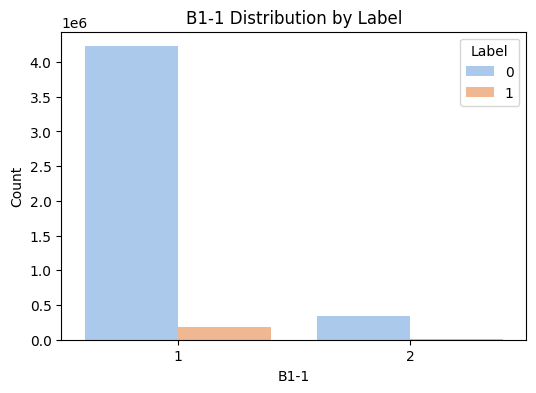

In [ ]:
# B1-1 - Label
plt.figure(figsize=(6,4))
sns.countplot(data=b12, x='B1-1', hue='Label', palette='pastel')
plt.title('B1-1 Distribution by Label')
plt.xlabel('B1-1')
plt.ylabel('Count')
plt.legend(title='Label')
plt.show()

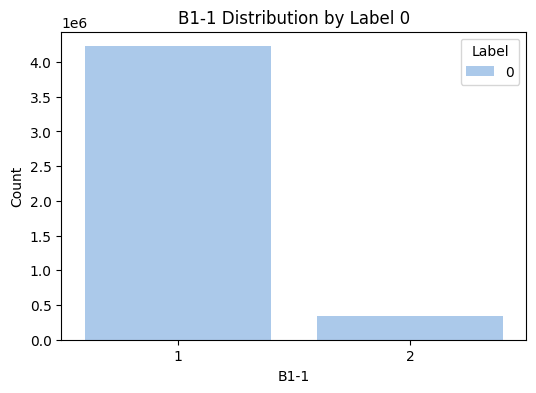

In [ ]:
 # B1-1 - Label 0
b1_label0 = b12[b12['Label'] == 0]

plt.figure(figsize=(6,4))
sns.countplot(data=b1_label0, x='B1-1', hue='Label', palette='pastel')
plt.title('B1-1 Distribution by Label 0')
plt.xlabel('B1-1')
plt.ylabel('Count')
plt.legend(title='Label')
plt.show()

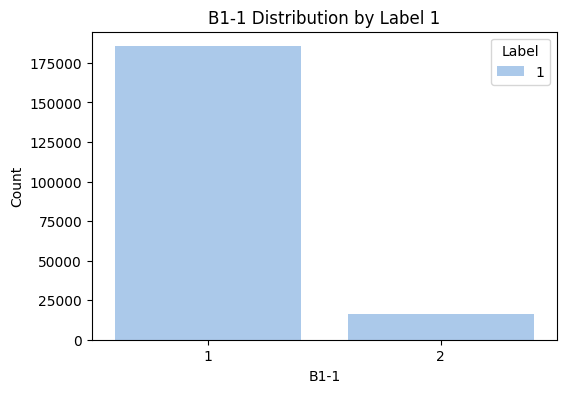

In [ ]:
 # B1-1 - Label 1
b1_label1 = b12[b12['Label'] == 1]

plt.figure(figsize=(6,4))
sns.countplot(data=b1_label1, x='B1-1', hue='Label', palette='pastel')
plt.title('B1-1 Distribution by Label 1')
plt.xlabel('B1-1')
plt.ylabel('Count')
plt.legend(title='Label')
plt.show()

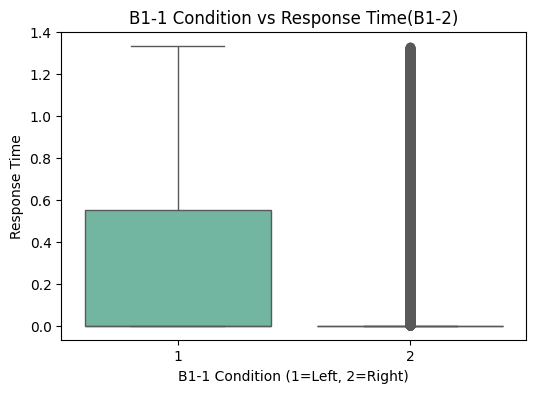

In [ ]:
plt.figure(figsize=(6,4))
sns.boxplot(data=b12, x='B1-1', y='B1-2', palette='Set2')
plt.title('B1-1 Condition vs Response Time(B1-2)')
plt.xlabel('B1-1 Condition (1=Left, 2=Right)')
plt.ylabel('Response Time')
plt.show()

In [ ]:
b12['B1-2'] = b12['B1-2'].astype(float)
summary_b12 = b12.groupby("B1-1")["B1-2"].describe().T
display(summary_b12)

B1-1,1,2
count,4.409554e+06,350718.000000
mean,2.288549e-01,0.172131
std,3.781756e-01,0.355035
min,0.000000e+00,0.000000
25%,0.000000e+00,0.000000
50%,0.000000e+00,0.000000
75%,5.506279e-01,0.000000
max,1.335200e+00,1.330693


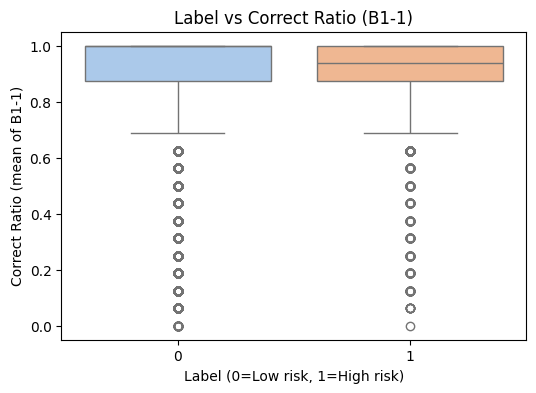

In [ ]:
# 참가자 단위로 평균 정답률 계산
train_b12['B1-1_ratio'] = train_b12['B1-1'].apply(lambda x: x.count(1)/len(x))

plt.figure(figsize=(6,4))
sns.boxplot(data=train_b12, x='Label', y='B1-1_ratio', palette='pastel')
plt.title('Label vs Correct Ratio (B1-1)')
plt.xlabel('Label (0=Low risk, 1=High risk)')
plt.ylabel('Correct Ratio (mean of B1-1)')
plt.show()

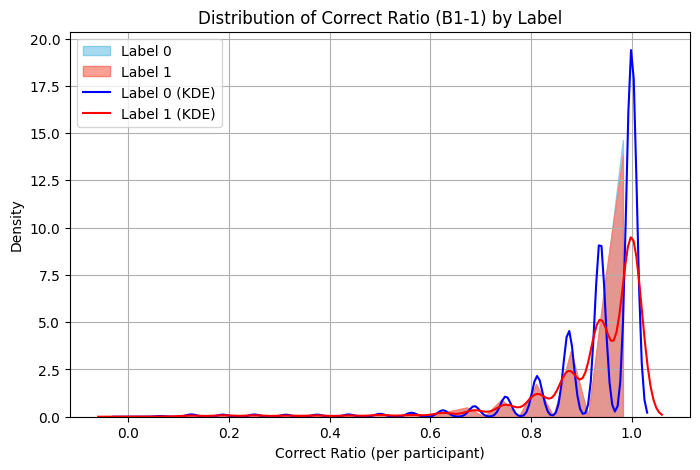

In [ ]:
# KDE Plot
bins = np.linspace(0, 1, 30)

plt.figure(figsize=(8,5))
sns.histplot(train_b12[train_b12['Label'] == 0]['B1-1_ratio'], bins=bins, kde=False, stat='density', color='skyblue', label='Label 0', element='poly')
sns.histplot(train_b12[train_b12['Label'] == 1]['B1-1_ratio'], bins=bins, kde=False, stat='density', color='salmon', label='Label 1', element='poly')

sns.kdeplot(train_b12[train_b12['Label'] == 0]['B1-1_ratio'], color='blue', label='Label 0 (KDE)')
sns.kdeplot(train_b12[train_b12['Label'] == 1]['B1-1_ratio'], color='red', label='Label 1 (KDE)')

plt.title('Distribution of Correct Ratio (B1-1) by Label')
plt.xlabel('Correct Ratio (per participant)')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.show()

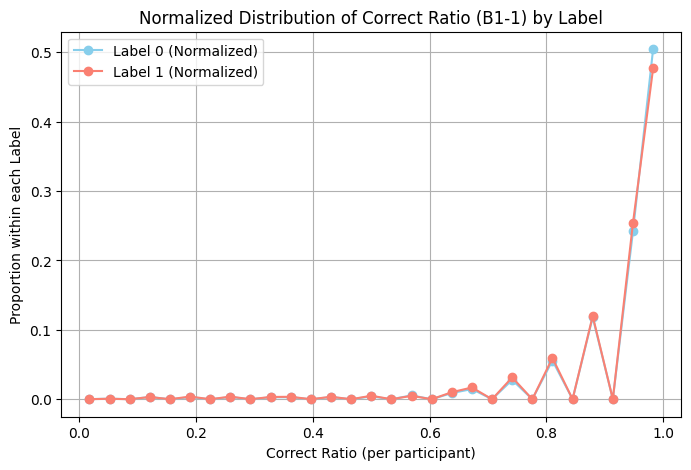

In [ ]:
# Normalized
counts_0, _ = np.histogram(train_b12[train_b12['Label']==0]['B1-1_ratio'], bins=bins)
counts_1, _ = np.histogram(train_b12[train_b12['Label']==1]['B1-1_ratio'], bins=bins)
counts_0 = counts_0 / counts_0.sum()
counts_1 = counts_1 / counts_1.sum()
bin_centers = (bins[:-1]+bins[1:])/2

plt.figure(figsize=(8,5))
plt.plot(bin_centers, counts_0, marker='o', color='skyblue', label='Label 0 (Normalized)')
plt.plot(bin_centers, counts_1, marker='o', color='salmon', label='Label 1 (Normalized)')
plt.title('Normalized Distribution of Correct Ratio (B1-1) by Label')
plt.xlabel('Correct Ratio (per participant)')
plt.ylabel('Proportion within each Label')
plt.legend()
plt.grid(True)
plt.show()

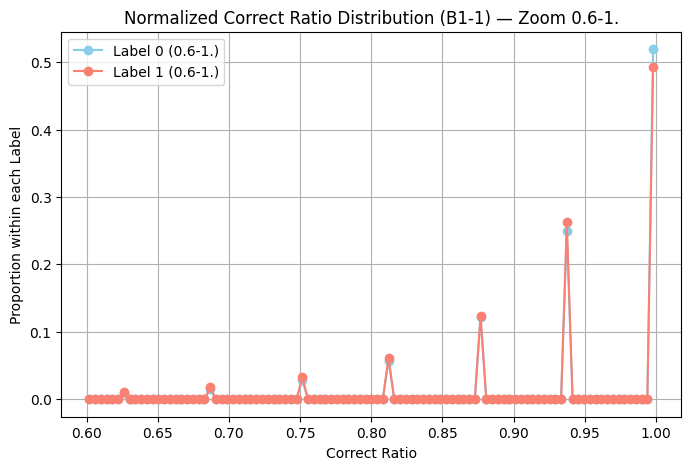

In [ ]:
bins_low = np.linspace(0.6, 1., 100)
c0_low, _ = np.histogram(train_b12[train_b12['Label'] == 0]['B1-1_ratio'].dropna(), bins=bins_low)
c1_low, _ = np.histogram(train_b12[train_b12['Label'] == 1]['B1-1_ratio'].dropna(), bins=bins_low)
c0_low = c0_low / c0_low.sum() if c0_low.sum()>0 else c0_low
c1_low = c1_low / c1_low.sum() if c1_low.sum()>0 else c1_low
centers_low = (bins_low[:-1] + bins_low[1:]) / 2

plt.figure(figsize=(8,5))
plt.plot(centers_low, c0_low, marker='o', color='skyblue', label='Label 0 (0.6-1.)')
plt.plot(centers_low, c1_low, marker='o', color='salmon', label='Label 1 (0.6-1.)')
plt.title('Normalized Correct Ratio Distribution (B1-1) — Zoom 0.6-1.')
plt.xlabel('Correct Ratio')
plt.ylabel('Proportion within each Label')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
def extract_b1_features(df):
    df = df.copy()

    df['B1-1_correct_count'] = df['B1-1'].apply(lambda x: x.count(1) if isinstance(x, list) else np.nan)
    df['B1-1_incorrect_count'] = df['B1-1'].apply(lambda x: x.count(2) if isinstance(x, list) else np.nan)
    df['B1-1_total'] = df['B1-1'].apply(lambda x: len(x) if isinstance(x, list) else 0)
    df['B1-1_ratio'] = df.apply(lambda r: (r['B1-1_correct_count']/r['B1-1_total']) if r['B1-1_total']>0 else np.nan, axis=1)

    return df[['Label','B1-1_correct_count','B1-1_incorrect_count','B1-1_ratio']]

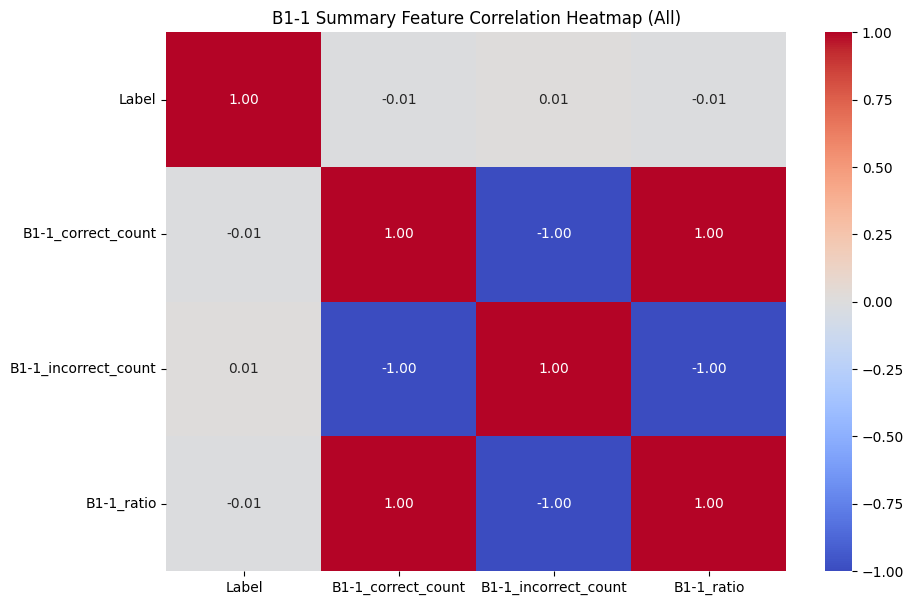

In [ ]:
b1_features = extract_b1_features(train_b12)
corr = b1_features.corr()

plt.figure(figsize=(10,7))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', center=0)
plt.title("B1-1 Summary Feature Correlation Heatmap (All)")
plt.show()

### B1-3

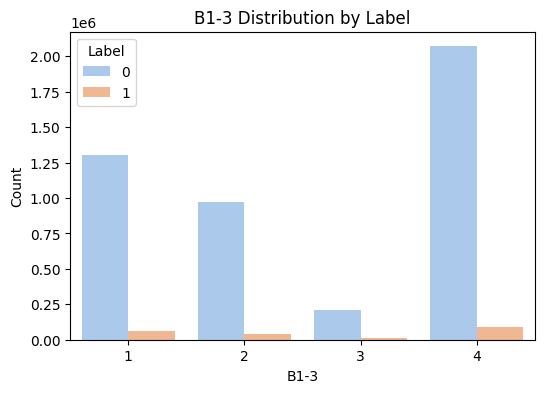

In [ ]:
# B1-3 - Label
plt.figure(figsize=(6,4))
sns.countplot(data=b12, x='B1-3', hue='Label', palette='pastel')
plt.title('B1-3 Distribution by Label')
plt.xlabel('B1-3')
plt.ylabel('Count')
plt.legend(title='Label')
plt.show()

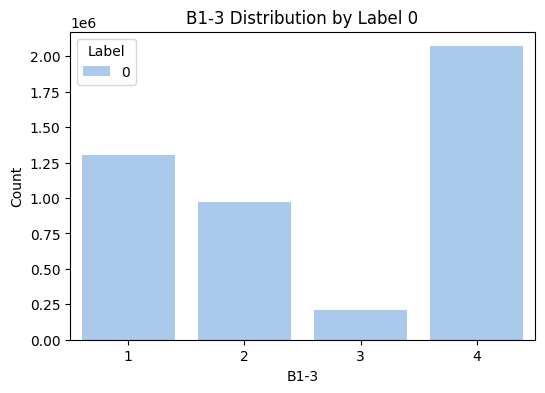

In [ ]:
 # B1-3 - Label 0
b3_label0 = b12[b12['Label'] == 0]

plt.figure(figsize=(6,4))
sns.countplot(data=b3_label0, x='B1-3', hue='Label', palette='pastel')
plt.title('B1-3 Distribution by Label 0')
plt.xlabel('B1-3')
plt.ylabel('Count')
plt.legend(title='Label')
plt.show()

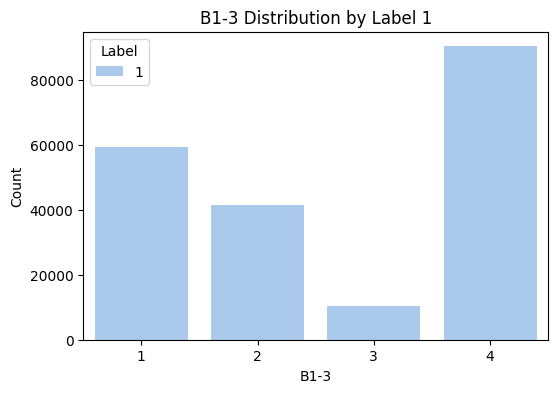

In [ ]:
 # B1-3 - Label 1
b3_label0 = b12[b12['Label'] == 1]

plt.figure(figsize=(6,4))
sns.countplot(data=b3_label0, x='B1-3', hue='Label', palette='pastel')
plt.title('B1-3 Distribution by Label 1')
plt.xlabel('B1-3')
plt.ylabel('Count')
plt.legend(title='Label')
plt.show()

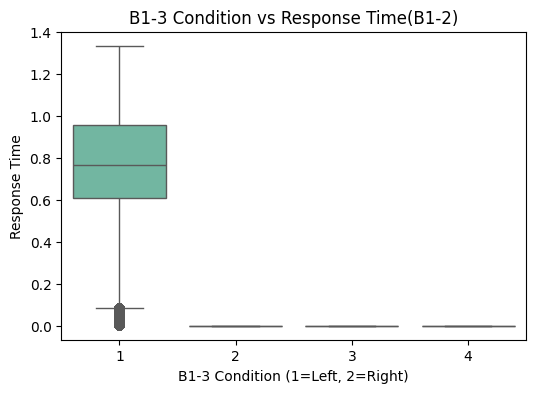

In [ ]:
plt.figure(figsize=(6,4))
sns.boxplot(data=b12, x='B1-3', y='B1-2', palette='Set2')
plt.title('B1-3 Condition vs Response Time(B1-2)')
plt.xlabel('B1-3 Condition (1=Left, 2=Right)')
plt.ylabel('Response Time')
plt.show()

In [ ]:
b12['B1-2'] = b12['B1-2'].astype(float)
summary_b13 = b12.groupby("B1-3")["B1-2"].describe().T
display(summary_b13)

B1-3,1,2,3,4
count,1.364511e+06,1015625.0,219807.0,2160329.0
mean,7.838103e-01,0.0,0.0,0.0
std,2.389185e-01,0.0,0.0,0.0
min,2.241600e-03,0.0,0.0,0.0
25%,6.086880e-01,0.0,0.0,0.0
50%,7.672979e-01,0.0,0.0,0.0
75%,9.571599e-01,0.0,0.0,0.0
max,1.335200e+00,0.0,0.0,0.0


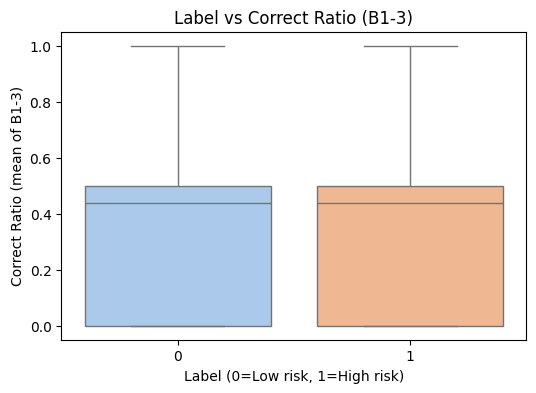

In [ ]:
# 참가자 단위로 평균 정답률 계산
train_b12['B1-3_ratio'] = train_b12['B1-3'].apply(lambda x: (x.count(1) + x.count(3))/len(x))

plt.figure(figsize=(6,4))
sns.boxplot(data=train_b12, x='Label', y='B1-3_ratio', palette='pastel')
plt.title('Label vs Correct Ratio (B1-3)')
plt.xlabel('Label (0=Low risk, 1=High risk)')
plt.ylabel('Correct Ratio (mean of B1-3)')
plt.show()

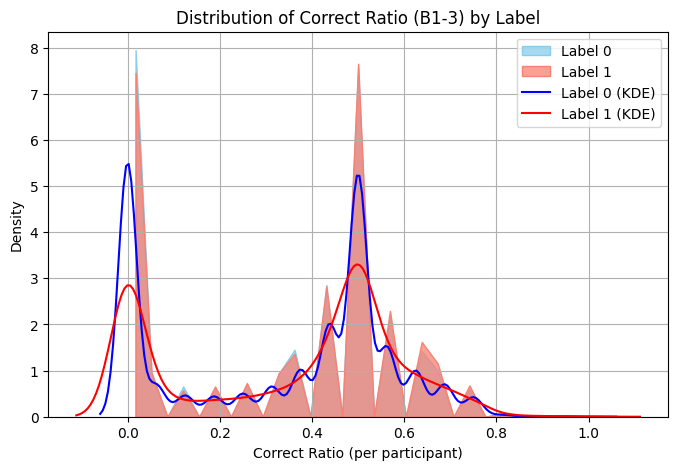

In [ ]:
# KDE Plot
bins = np.linspace(0, 1, 30)

plt.figure(figsize=(8,5))
sns.histplot(train_b12[train_b12['Label'] == 0]['B1-3_ratio'], bins=bins, kde=False, stat='density', color='skyblue', label='Label 0', element='poly')
sns.histplot(train_b12[train_b12['Label'] == 1]['B1-3_ratio'], bins=bins, kde=False, stat='density', color='salmon', label='Label 1', element='poly')

sns.kdeplot(train_b12[train_b12['Label'] == 0]['B1-3_ratio'], color='blue', label='Label 0 (KDE)')
sns.kdeplot(train_b12[train_b12['Label'] == 1]['B1-3_ratio'], color='red', label='Label 1 (KDE)')

plt.title('Distribution of Correct Ratio (B1-3) by Label')
plt.xlabel('Correct Ratio (per participant)')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.show()

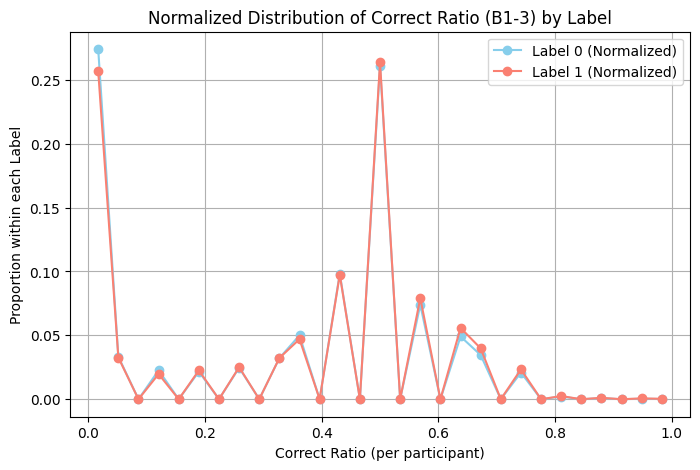

In [ ]:
# Normalized
counts_0, _ = np.histogram(train_b12[train_b12['Label']==0]['B1-3_ratio'], bins=bins)
counts_1, _ = np.histogram(train_b12[train_b12['Label']==1]['B1-3_ratio'], bins=bins)
counts_0 = counts_0 / counts_0.sum()
counts_1 = counts_1 / counts_1.sum()
bin_centers = (bins[:-1]+bins[1:])/2

plt.figure(figsize=(8,5))
plt.plot(bin_centers, counts_0, marker='o', color='skyblue', label='Label 0 (Normalized)')
plt.plot(bin_centers, counts_1, marker='o', color='salmon', label='Label 1 (Normalized)')
plt.title('Normalized Distribution of Correct Ratio (B1-3) by Label')
plt.xlabel('Correct Ratio (per participant)')
plt.ylabel('Proportion within each Label')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
def extract_b1_features(df):
    df = df.copy()

    df['B1-3_correct_count'] = df['B1-3'].apply(lambda x: x.count(1) + x.count(3) if isinstance(x, list) else np.nan)
    df['B1-3_incorrect_count'] = df['B1-3'].apply(lambda x: x.count(2) + x.count(4) if isinstance(x, list) else np.nan)
    df['B1-3_total'] = df['B1-3'].apply(lambda x: len(x) if isinstance(x, list) else 0)
    df['B1-3_ratio'] = df.apply(lambda r: (r['B1-3_correct_count']/r['B1-3_total']) if r['B1-3_total']>0 else np.nan, axis=1)

    return df[['Label','B1-3_correct_count','B1-3_incorrect_count','B1-3_ratio']]

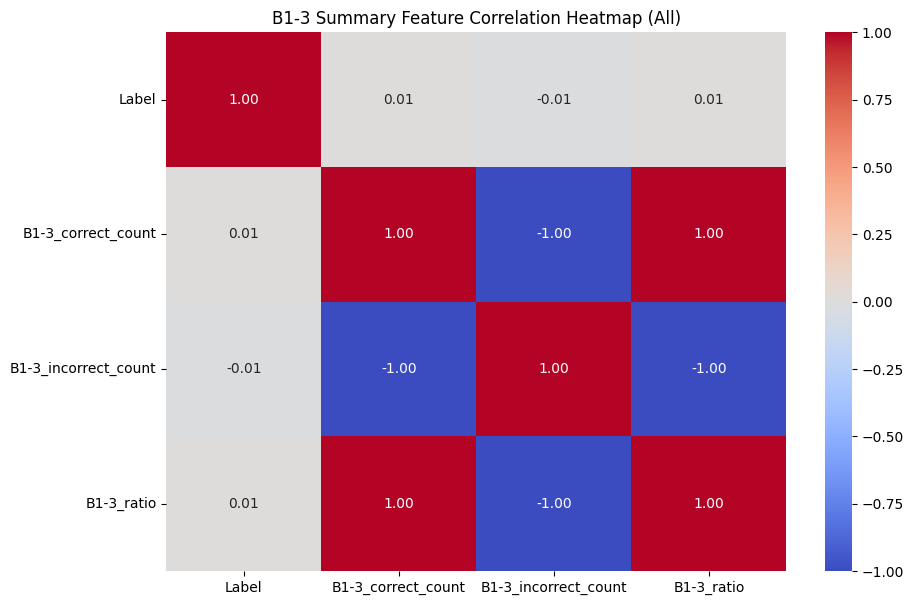

In [ ]:
b1_features = extract_b1_features(train_b12)
corr = b1_features.corr()

plt.figure(figsize=(10,7))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', center=0)
plt.title("B1-3 Summary Feature Correlation Heatmap (All)")
plt.show()

### B2-1

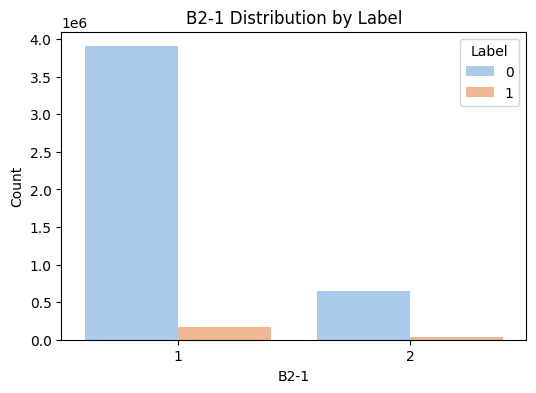

In [ ]:
# B2-1 - Label
plt.figure(figsize=(6,4))
sns.countplot(data=b12, x='B2-1', hue='Label', palette='pastel')
plt.title('B2-1 Distribution by Label')
plt.xlabel('B2-1')
plt.ylabel('Count')
plt.legend(title='Label')
plt.show()

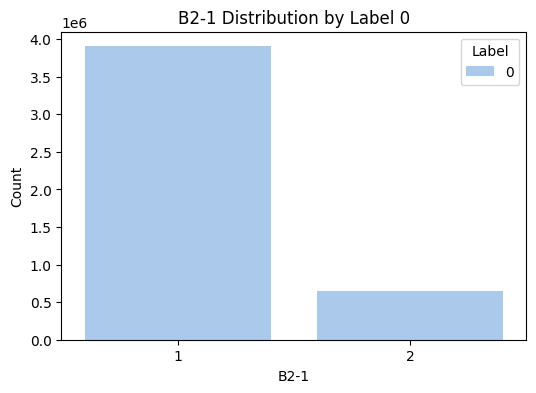

In [ ]:
 # B2-1 - Label 0
b1_label0 = b12[b12['Label'] == 0]

plt.figure(figsize=(6,4))
sns.countplot(data=b1_label0, x='B2-1', hue='Label', palette='pastel')
plt.title('B2-1 Distribution by Label 0')
plt.xlabel('B2-1')
plt.ylabel('Count')
plt.legend(title='Label')
plt.show()

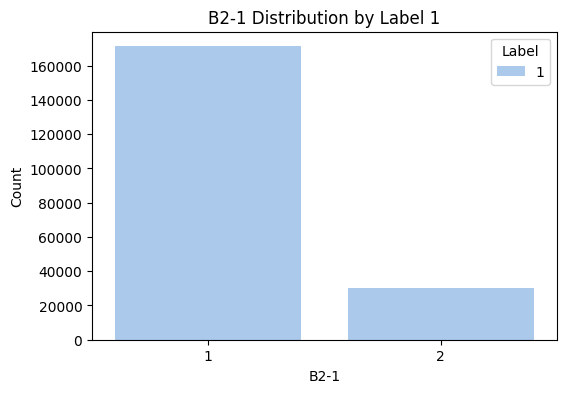

In [ ]:
 # B2-1 - Label 1
b1_label1 = b12[b12['Label'] == 1]

plt.figure(figsize=(6,4))
sns.countplot(data=b1_label1, x='B2-1', hue='Label', palette='pastel')
plt.title('B2-1 Distribution by Label 1')
plt.xlabel('B2-1')
plt.ylabel('Count')
plt.legend(title='Label')
plt.show()

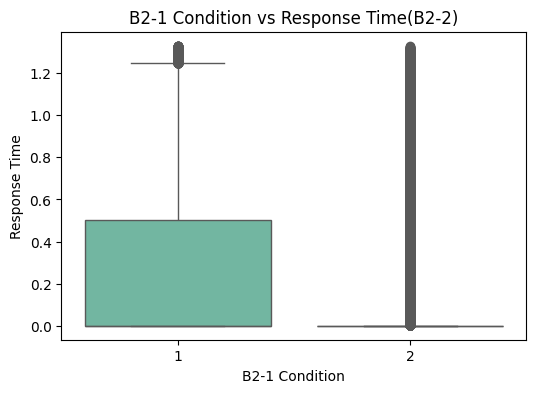

In [ ]:
plt.figure(figsize=(6,4))
sns.boxplot(data=b12, x='B2-1', y='B2-2', palette='Set2')
plt.title('B2-1 Condition vs Response Time(B2-2)')
plt.xlabel('B2-1 Condition')
plt.ylabel('Response Time')
plt.show()

In [ ]:
b12['B2-2'] = b12['B2-2'].astype(float)
summary_b22 = b12.groupby("B2-1")["B2-2"].describe().T
display(summary_b22)

B2-1,1,2
count,4.076520e+06,683752.000000
mean,2.024490e-01,0.172996
std,3.469477e-01,0.337873
min,0.000000e+00,0.000000
25%,0.000000e+00,0.000000
50%,0.000000e+00,0.000000
75%,5.001243e-01,0.000000
max,1.330494e+00,1.328613


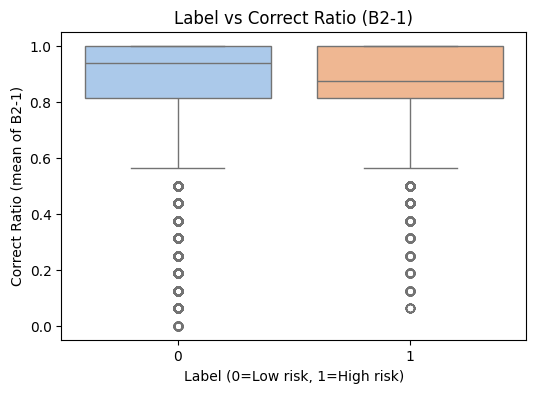

In [ ]:
# 참가자 단위로 평균 정답률 계산
train_b12['B2-1_ratio'] = train_b12['B2-1'].apply(lambda x: x.count(1)/len(x))

plt.figure(figsize=(6,4))
sns.boxplot(data=train_b12, x='Label', y='B2-1_ratio', palette='pastel')
plt.title('Label vs Correct Ratio (B2-1)')
plt.xlabel('Label (0=Low risk, 1=High risk)')
plt.ylabel('Correct Ratio (mean of B2-1)')
plt.show()

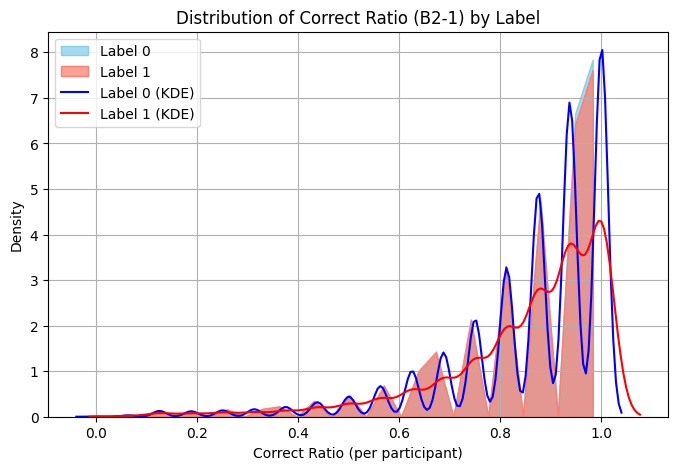

In [ ]:
# KDE Plot
bins = np.linspace(0, 1, 30)

plt.figure(figsize=(8,5))
sns.histplot(train_b12[train_b12['Label'] == 0]['B2-1_ratio'], bins=bins, kde=False, stat='density', color='skyblue', label='Label 0', element='poly')
sns.histplot(train_b12[train_b12['Label'] == 1]['B2-1_ratio'], bins=bins, kde=False, stat='density', color='salmon', label='Label 1', element='poly')

sns.kdeplot(train_b12[train_b12['Label'] == 0]['B2-1_ratio'], color='blue', label='Label 0 (KDE)')
sns.kdeplot(train_b12[train_b12['Label'] == 1]['B2-1_ratio'], color='red', label='Label 1 (KDE)')

plt.title('Distribution of Correct Ratio (B2-1) by Label')
plt.xlabel('Correct Ratio (per participant)')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.show()

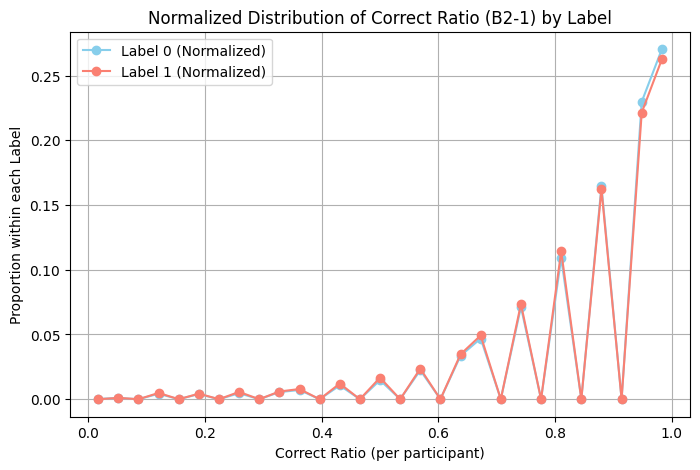

In [ ]:
# Normalized
counts_0, _ = np.histogram(train_b12[train_b12['Label']==0]['B2-1_ratio'], bins=bins)
counts_1, _ = np.histogram(train_b12[train_b12['Label']==1]['B2-1_ratio'], bins=bins)
counts_0 = counts_0 / counts_0.sum()
counts_1 = counts_1 / counts_1.sum()
bin_centers = (bins[:-1]+bins[1:])/2

plt.figure(figsize=(8,5))
plt.plot(bin_centers, counts_0, marker='o', color='skyblue', label='Label 0 (Normalized)')
plt.plot(bin_centers, counts_1, marker='o', color='salmon', label='Label 1 (Normalized)')
plt.title('Normalized Distribution of Correct Ratio (B2-1) by Label')
plt.xlabel('Correct Ratio (per participant)')
plt.ylabel('Proportion within each Label')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
def extract_b2_features(df):
    df = df.copy()

    df['B2-1_correct_count'] = df['B2-1'].apply(lambda x: x.count(1) if isinstance(x, list) else np.nan)
    df['B2-1_incorrect_count'] = df['B2-1'].apply(lambda x: x.count(2) if isinstance(x, list) else np.nan)
    df['B2-1_total'] = df['B2-1'].apply(lambda x: len(x) if isinstance(x, list) else 0)
    df['B2-1_ratio'] = df.apply(lambda r: (r['B2-1_correct_count']/r['B2-1_total']) if r['B2-1_total']>0 else np.nan, axis=1)

    return df[['Label','B2-1_correct_count','B2-1_incorrect_count','B2-1_ratio']]

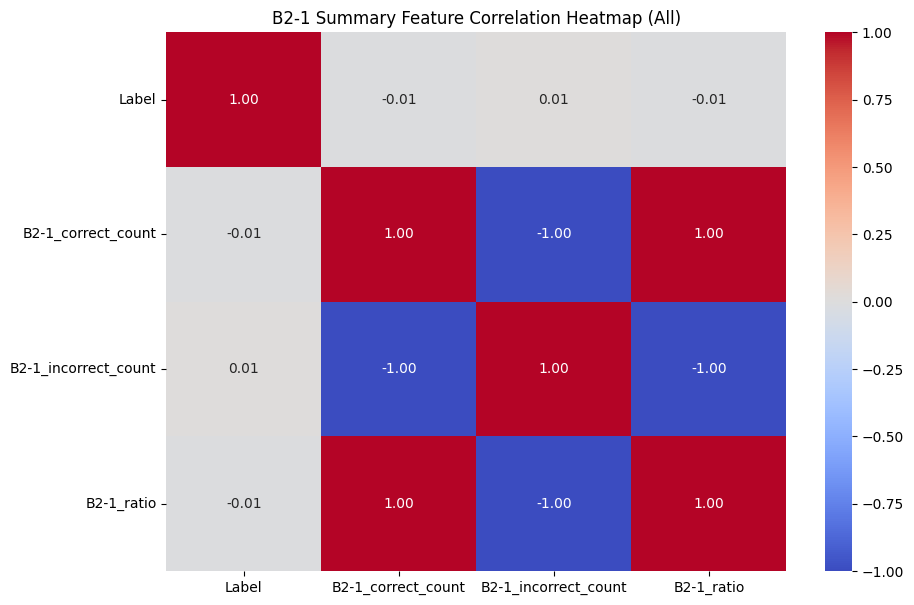

In [ ]:
b2_features = extract_b2_features(train_b12)
corr = b2_features.corr()

plt.figure(figsize=(10,7))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', center=0)
plt.title("B2-1 Summary Feature Correlation Heatmap (All)")
plt.show()

### B2-3

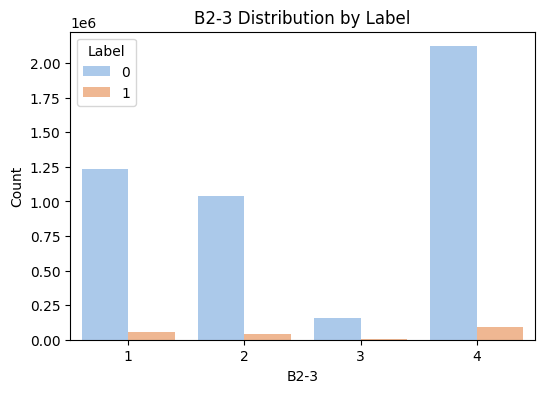

In [ ]:
# B2-3 - Label
plt.figure(figsize=(6,4))
sns.countplot(data=b12, x='B2-3', hue='Label', palette='pastel')
plt.title('B2-3 Distribution by Label')
plt.xlabel('B2-3')
plt.ylabel('Count')
plt.legend(title='Label')
plt.show()

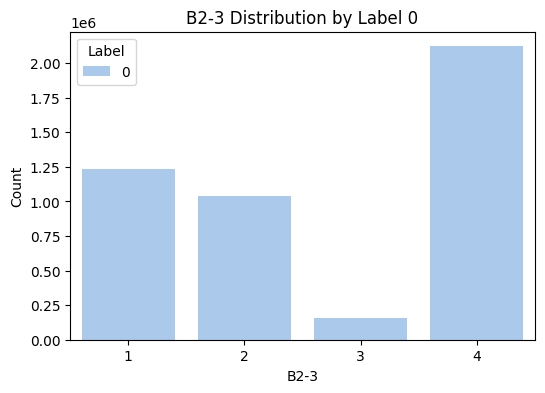

In [ ]:
 # B2-3 - Label 0
b3_label0 = b12[b12['Label'] == 0]

plt.figure(figsize=(6,4))
sns.countplot(data=b3_label0, x='B2-3', hue='Label', palette='pastel')
plt.title('B2-3 Distribution by Label 0')
plt.xlabel('B2-3')
plt.ylabel('Count')
plt.legend(title='Label')
plt.show()

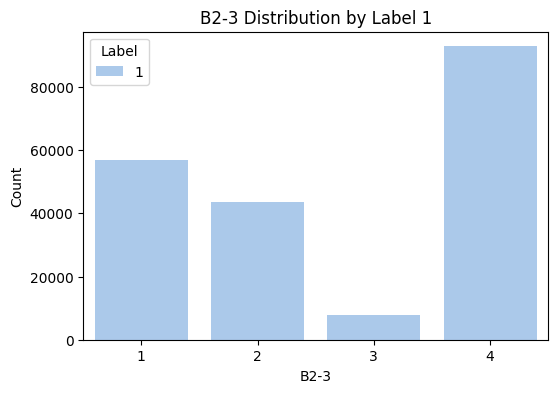

In [ ]:
 # B2-3 - Label 1
b3_label0 = b12[b12['Label'] == 1]

plt.figure(figsize=(6,4))
sns.countplot(data=b3_label0, x='B2-3', hue='Label', palette='pastel')
plt.title('B2-3 Distribution by Label 1')
plt.xlabel('B2-3')
plt.ylabel('Count')
plt.legend(title='Label')
plt.show()

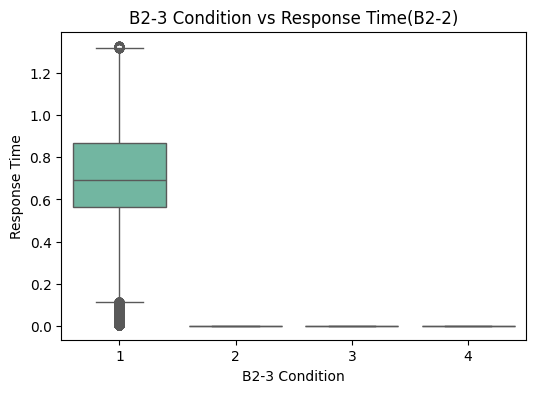

In [ ]:
plt.figure(figsize=(6,4))
sns.boxplot(data=b12, x='B2-3', y='B2-2', palette='Set2')
plt.title('B2-3 Condition vs Response Time(B2-2)')
plt.xlabel('B2-3 Condition')
plt.ylabel('Response Time')
plt.show()

In [ ]:
b12['B2-2'] = b12['B2-2'].astype(float)
summary_b23 = b12.groupby("B2-3")["B2-2"].describe().T
display(summary_b23)

B2-3,1,2,3,4
count,1.293787e+06,1086349.0,166244.0,2213892.0
mean,7.293115e-01,0.0,0.0,0.0
std,2.294931e-01,0.0,0.0,0.0
min,2.032300e-03,0.0,0.0,0.0
25%,5.664838e-01,0.0,0.0,0.0
50%,6.900989e-01,0.0,0.0,0.0
75%,8.677854e-01,0.0,0.0,0.0
max,1.330494e+00,0.0,0.0,0.0


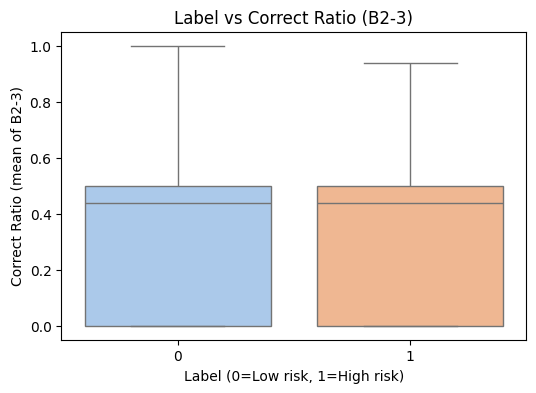

In [ ]:
# 참가자 단위로 평균 정답률 계산
train_b12['B2-3_ratio'] = train_b12['B2-3'].apply(lambda x: (x.count(1) + x.count(3))/len(x))

plt.figure(figsize=(6,4))
sns.boxplot(data=train_b12, x='Label', y='B2-3_ratio', palette='pastel')
plt.title('Label vs Correct Ratio (B2-3)')
plt.xlabel('Label (0=Low risk, 1=High risk)')
plt.ylabel('Correct Ratio (mean of B2-3)')
plt.show()

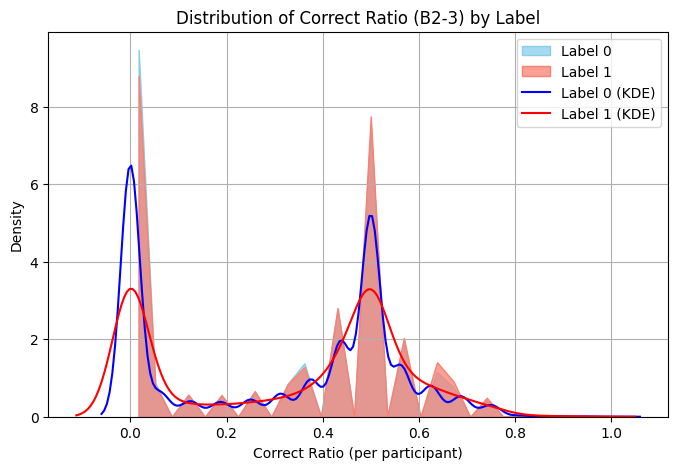

In [ ]:
# KDE Plot
bins = np.linspace(0, 1, 30)

plt.figure(figsize=(8,5))
sns.histplot(train_b12[train_b12['Label'] == 0]['B2-3_ratio'], bins=bins, kde=False, stat='density', color='skyblue', label='Label 0', element='poly')
sns.histplot(train_b12[train_b12['Label'] == 1]['B2-3_ratio'], bins=bins, kde=False, stat='density', color='salmon', label='Label 1', element='poly')

sns.kdeplot(train_b12[train_b12['Label'] == 0]['B2-3_ratio'], color='blue', label='Label 0 (KDE)')
sns.kdeplot(train_b12[train_b12['Label'] == 1]['B2-3_ratio'], color='red', label='Label 1 (KDE)')

plt.title('Distribution of Correct Ratio (B2-3) by Label')
plt.xlabel('Correct Ratio (per participant)')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.show()

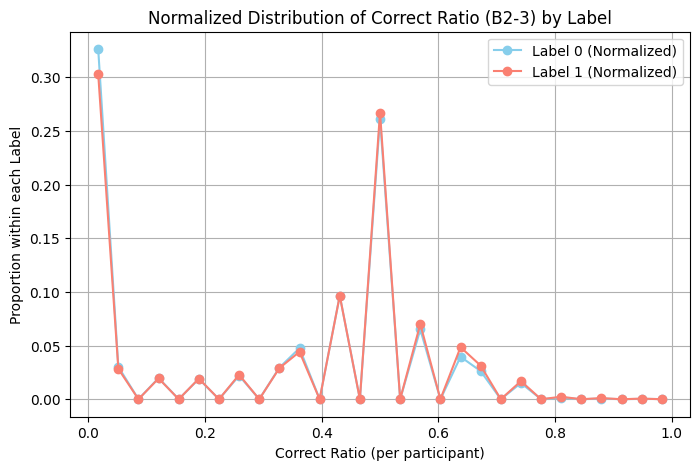

In [ ]:
# Normalized
counts_0, _ = np.histogram(train_b12[train_b12['Label']==0]['B2-3_ratio'], bins=bins)
counts_1, _ = np.histogram(train_b12[train_b12['Label']==1]['B2-3_ratio'], bins=bins)
counts_0 = counts_0 / counts_0.sum()
counts_1 = counts_1 / counts_1.sum()
bin_centers = (bins[:-1]+bins[1:])/2

plt.figure(figsize=(8,5))
plt.plot(bin_centers, counts_0, marker='o', color='skyblue', label='Label 0 (Normalized)')
plt.plot(bin_centers, counts_1, marker='o', color='salmon', label='Label 1 (Normalized)')
plt.title('Normalized Distribution of Correct Ratio (B2-3) by Label')
plt.xlabel('Correct Ratio (per participant)')
plt.ylabel('Proportion within each Label')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
def extract_b2_features(df):
    df = df.copy()

    df['B2-3_correct_count'] = df['B2-3'].apply(lambda x: x.count(1) + x.count(3) if isinstance(x, list) else np.nan)
    df['B2-3_incorrect_count'] = df['B2-3'].apply(lambda x: x.count(2) + x.count(4) if isinstance(x, list) else np.nan)
    df['B2-3_total'] = df['B2-3'].apply(lambda x: len(x) if isinstance(x, list) else 0)
    df['B2-3_ratio'] = df.apply(lambda r: (r['B2-3_correct_count']/r['B2-3_total']) if r['B2-3_total']>0 else np.nan, axis=1)

    return df[['Label','B2-3_correct_count','B2-3_incorrect_count','B2-3_ratio']]

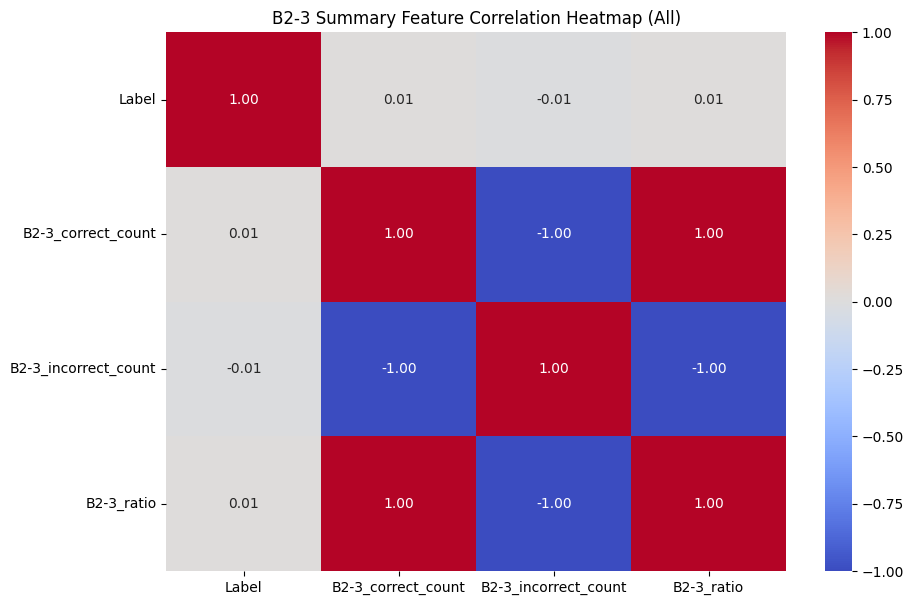

In [ ]:
b2_features = extract_b2_features(train_b12)
corr = b2_features.corr()

plt.figure(figsize=(10,7))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', center=0)
plt.title("B2-3 Summary Feature Correlation Heatmap (All)")
plt.show()

## **B3 Test**

In [ ]:
train_b3 = train_b[['Label', 'B3-1', 'B3-2']]
train_b3.head()

,Label,B3-1,B3-2
0,0,"1,1,1,1,1,1,1,1,1,1,1,1,1,1,1","0.6656752,0.6833098,0.7677646,0.7208845,0.7370..."
1,0,"1,1,1,1,1,1,1,1,1,1,1,1,1,1,1","0.4453995,0.4135641,0.416364,0.5122311,0.50182..."
2,0,"1,1,1,1,1,1,1,1,1,1,1,1,1,1,1","0.7674551,0.7509686,0.6508269,0.6670563,0.7005..."
3,0,"1,1,1,1,1,1,1,1,1,1,1,1,1,1,1","0.5208796,0.5994659,0.6474741,0.6791623,0.7570..."
4,0,"1,1,1,1,1,1,1,1,1,1,1,1,1,1,1","0.6506709,0.9673311,0.6675006,0.6337714,0.6841..."


In [ ]:
train_b3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297526 entries, 0 to 297525
Data columns (total 3 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   Label   297526 non-null  int64 
 1   B3-1    297523 non-null  object
 2   B3-2    297523 non-null  object
dtypes: int64(1), object(2)
memory usage: 6.8+ MB


In [ ]:
train_b3 = train_b3.dropna()
train_b3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 297523 entries, 0 to 297525
Data columns (total 3 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   Label   297523 non-null  int64 
 1   B3-1    297523 non-null  object
 2   B3-2    297523 non-null  object
dtypes: int64(1), object(2)
memory usage: 9.1+ MB


In [ ]:
# 16 trials -> list
train_b3['B3-1'] = train_b3['B3-1'].apply(lambda x: list(map(int, x.split(','))))
train_b3['B3-2'] = train_b3['B3-2'].apply(lambda x: list(map(float, x.split(','))))

In [ ]:
b3 = train_b3[['B3-1','B3-2','Label']].explode(['B3-1','B3-2']).copy()

### B3-1

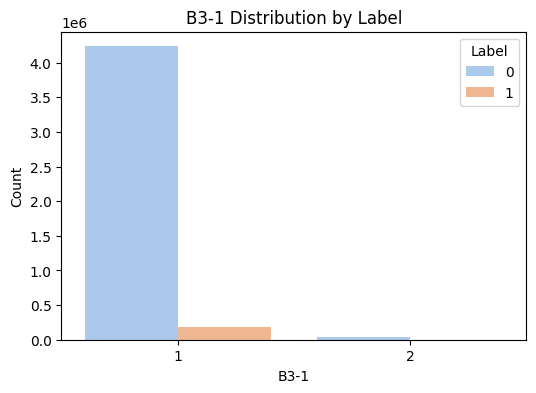

In [ ]:
# B3-1 - Label
plt.figure(figsize=(6,4))
sns.countplot(data=b3, x='B3-1', hue='Label', palette='pastel')
plt.title('B3-1 Distribution by Label')
plt.xlabel('B3-1')
plt.ylabel('Count')
plt.legend(title='Label')
plt.show()

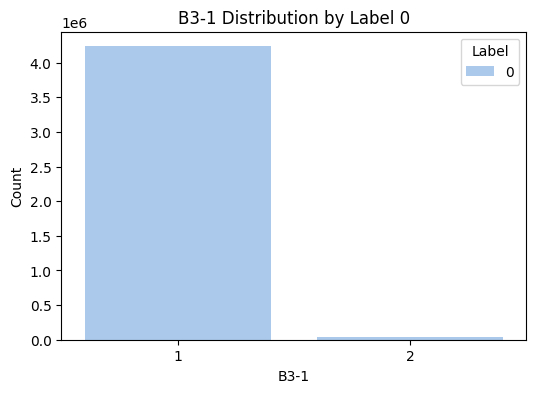

In [ ]:
 # B3-1 - Label 0
b3_label0 = b3[b3['Label'] == 0]

plt.figure(figsize=(6,4))
sns.countplot(data=b3_label0, x='B3-1', hue='Label', palette='pastel')
plt.title('B3-1 Distribution by Label 0')
plt.xlabel('B3-1')
plt.ylabel('Count')
plt.legend(title='Label')
plt.show()

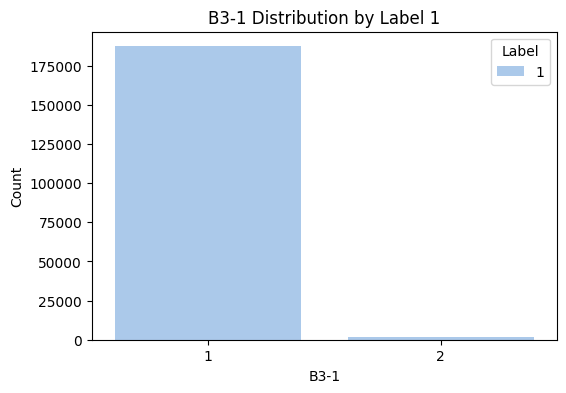

In [ ]:
 # B3-1 - Label 1
b3_label0 = b3[b3['Label'] == 1]

plt.figure(figsize=(6,4))
sns.countplot(data=b3_label0, x='B3-1', hue='Label', palette='pastel')
plt.title('B3-1 Distribution by Label 1')
plt.xlabel('B3-1')
plt.ylabel('Count')
plt.legend(title='Label')
plt.show()

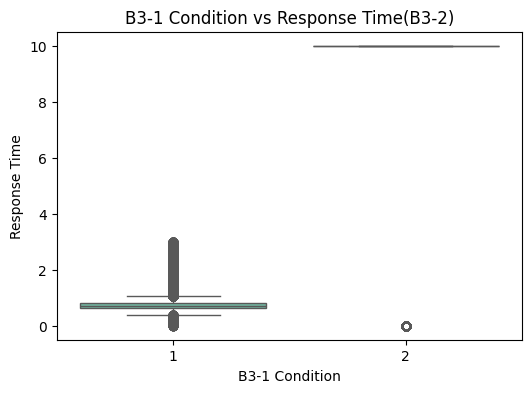

In [ ]:
plt.figure(figsize=(6,4))
sns.boxplot(data=b3, x='B3-1', y='B3-2', palette='Set2')
plt.title('B3-1 Condition vs Response Time(B3-2)')
plt.xlabel('B3-1 Condition')
plt.ylabel('Response Time')
plt.show()

In [ ]:
b3['B3-2'] = b3['B3-2'].astype(float)
summary_b3 = b3.groupby("B3-1")["B3-2"].describe().T
display(summary_b3)

B3-1,1,2
count,4.421989e+06,40856.000000
mean,7.289627e-01,9.777511
std,1.615165e-01,1.474937
min,7.013800e-03,0.000000
25%,6.328654e-01,10.000000
50%,7.007251e-01,10.000000
75%,8.005795e-01,10.000000
max,2.999912e+00,10.000000


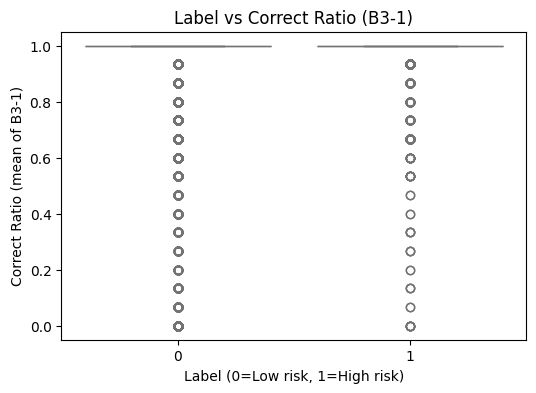

In [ ]:
# 참가자 단위로 평균 정답률 계산
train_b3['B3-1_ratio'] = train_b3['B3-1'].apply(lambda x: x.count(1)/len(x))

plt.figure(figsize=(6,4))
sns.boxplot(data=train_b3, x='Label', y='B3-1_ratio', palette='pastel')
plt.title('Label vs Correct Ratio (B3-1)')
plt.xlabel('Label (0=Low risk, 1=High risk)')
plt.ylabel('Correct Ratio (mean of B3-1)')
plt.show()

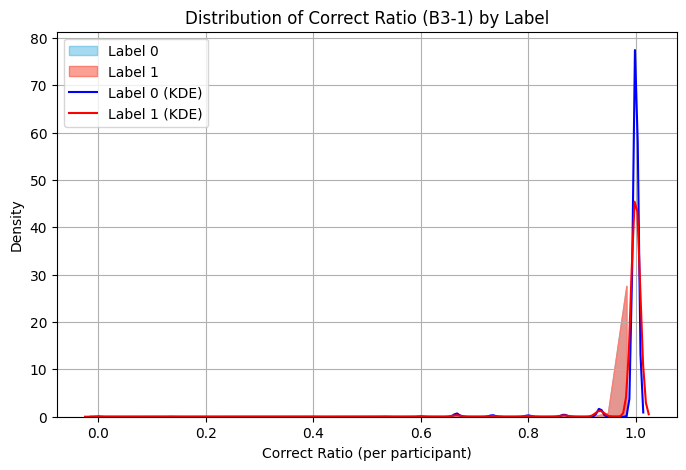

In [ ]:
# KDE Plot
bins = np.linspace(0, 1, 30)

plt.figure(figsize=(8,5))
sns.histplot(train_b3[train_b3['Label'] == 0]['B3-1_ratio'], bins=bins, kde=False, stat='density', color='skyblue', label='Label 0', element='poly')
sns.histplot(train_b3[train_b3['Label'] == 1]['B3-1_ratio'], bins=bins, kde=False, stat='density', color='salmon', label='Label 1', element='poly')

sns.kdeplot(train_b3[train_b3['Label'] == 0]['B3-1_ratio'], color='blue', label='Label 0 (KDE)')
sns.kdeplot(train_b3[train_b3['Label'] == 1]['B3-1_ratio'], color='red', label='Label 1 (KDE)')

plt.title('Distribution of Correct Ratio (B3-1) by Label')
plt.xlabel('Correct Ratio (per participant)')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.show()

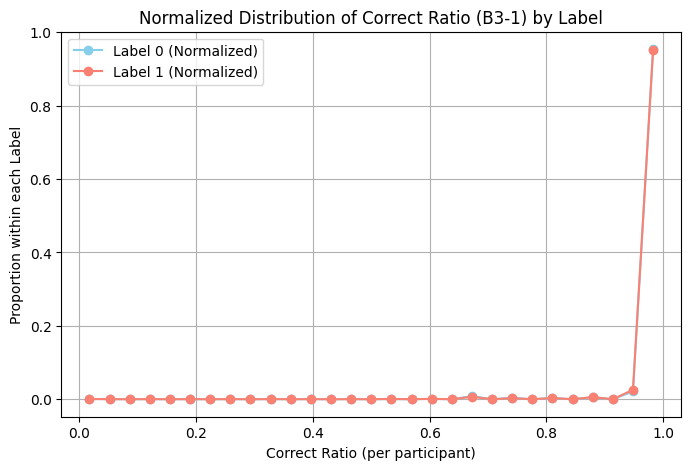

In [ ]:
# Normalized
counts_0, _ = np.histogram(train_b3[train_b3['Label']==0]['B3-1_ratio'], bins=bins)
counts_1, _ = np.histogram(train_b3[train_b3['Label']==1]['B3-1_ratio'], bins=bins)
counts_0 = counts_0 / counts_0.sum()
counts_1 = counts_1 / counts_1.sum()
bin_centers = (bins[:-1]+bins[1:])/2

plt.figure(figsize=(8,5))
plt.plot(bin_centers, counts_0, marker='o', color='skyblue', label='Label 0 (Normalized)')
plt.plot(bin_centers, counts_1, marker='o', color='salmon', label='Label 1 (Normalized)')
plt.title('Normalized Distribution of Correct Ratio (B3-1) by Label')
plt.xlabel('Correct Ratio (per participant)')
plt.ylabel('Proportion within each Label')
plt.legend()
plt.grid(True)
plt.show()

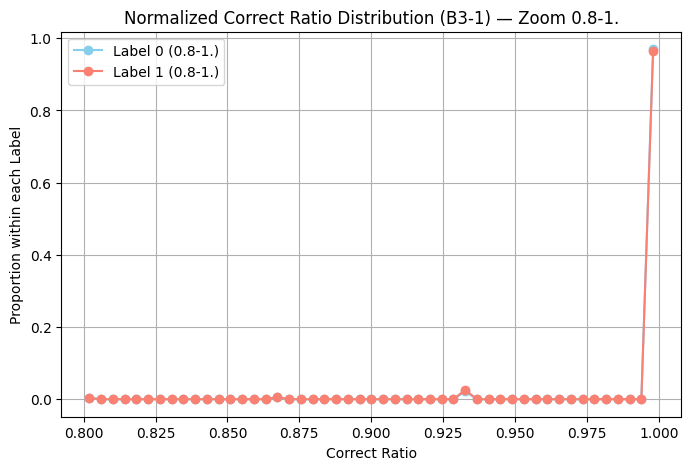

In [ ]:
bins_low = np.linspace(0.8, 1., 50)
c0_low, _ = np.histogram(train_b3[train_b3['Label'] == 0]['B3-1_ratio'].dropna(), bins=bins_low)
c1_low, _ = np.histogram(train_b3[train_b3['Label'] == 1]['B3-1_ratio'].dropna(), bins=bins_low)
c0_low = c0_low / c0_low.sum() if c0_low.sum()>0 else c0_low
c1_low = c1_low / c1_low.sum() if c1_low.sum()>0 else c1_low
centers_low = (bins_low[:-1] + bins_low[1:]) / 2

plt.figure(figsize=(8,5))
plt.plot(centers_low, c0_low, marker='o', color='skyblue', label='Label 0 (0.8-1.)')
plt.plot(centers_low, c1_low, marker='o', color='salmon', label='Label 1 (0.8-1.)')
plt.title('Normalized Correct Ratio Distribution (B3-1) — Zoom 0.8-1.')
plt.xlabel('Correct Ratio')
plt.ylabel('Proportion within each Label')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
def extract_b3_features(df):
    df = df.copy()

    df['B3-1_correct_count'] = df['B3-1'].apply(lambda x: x.count(1) if isinstance(x, list) else np.nan)
    df['B3-1_incorrect_count'] = df['B3-1'].apply(lambda x: x.count(2) if isinstance(x, list) else np.nan)
    df['B3-1_total'] = df['B3-1'].apply(lambda x: len(x) if isinstance(x, list) else 0)
    df['B3-1_ratio'] = df.apply(lambda r: (r['B3-1_correct_count']/r['B3-1_total']) if r['B3-1_total']>0 else np.nan, axis=1)

    return df[['Label','B3-1_correct_count','B3-1_incorrect_count','B3-1_ratio']]

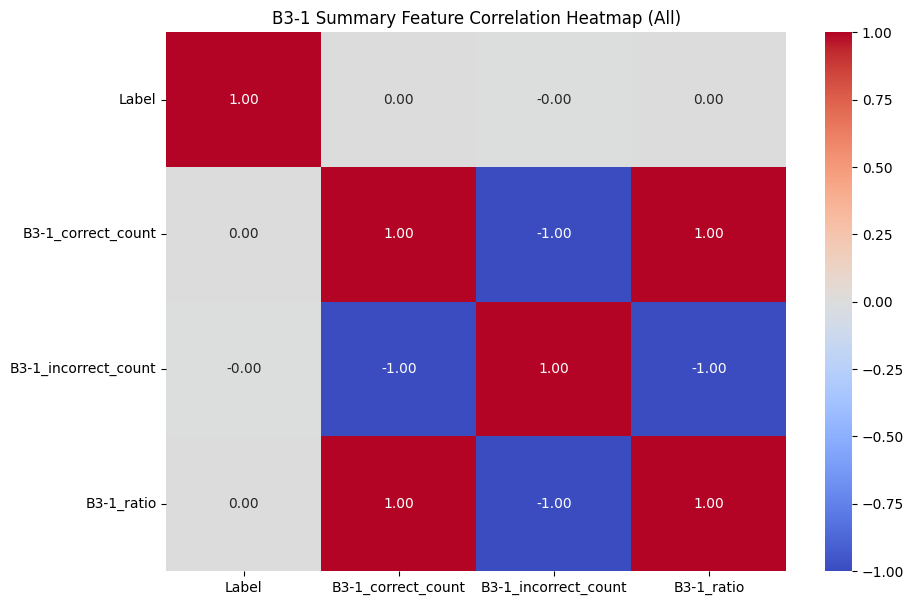

In [ ]:
b3_features = extract_b3_features(train_b3)
corr = b3_features.corr()

plt.figure(figsize=(10,7))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', center=0)
plt.title("B3-1 Summary Feature Correlation Heatmap (All)")
plt.show()

## **B4 Test**

In [ ]:
train_b4 = train_b[['Label', 'B4-1', 'B4-2']]
train_b4.head()

,Label,B4-1,B4-2
0,0,"5,3,5,3,1,3,1,1,3,3,1,5,1,1,1,1,1,1,1,5,3,1,5,...","0.91,1.19,0.67,0.52,1.03,0.98,0.87,0.57,0.67,0..."
1,0,"5,5,1,5,1,1,1,1,1,5,1,3,1,5,1,1,3,1,1,1,3,5,1,...","0.79,0.57,0.57,0.62,0.63,0.62,0.58,0.62,0.47,0..."
2,0,"3,1,5,1,5,1,1,1,1,3,5,3,5,1,1,3,1,6,5,5,1,1,3,...","0.80,0.80,0.73,0.70,0.60,0.75,0.80,0.53,0.70,0..."
3,0,"1,1,1,1,5,5,2,5,3,3,5,1,1,3,3,1,3,3,3,1,6,4,1,...","0.67,0.58,0.54,0.54,0.74,0.48,0.58,0.63,0.53,0..."
4,0,"1,1,1,4,1,3,1,5,5,3,1,3,5,5,5,1,1,5,5,5,3,3,1,...","0.67,0.55,0.47,0.42,0.82,0.72,0.52,0.67,0.72,0..."


In [ ]:
train_b4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297526 entries, 0 to 297525
Data columns (total 3 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   Label   297526 non-null  int64 
 1   B4-1    297523 non-null  object
 2   B4-2    297523 non-null  object
dtypes: int64(1), object(2)
memory usage: 6.8+ MB


In [ ]:
train_b4 = train_b4.dropna()
train_b4.info()

<class 'pandas.core.frame.DataFrame'>
Index: 297523 entries, 0 to 297525
Data columns (total 3 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   Label   297523 non-null  int64 
 1   B4-1    297523 non-null  object
 2   B4-2    297523 non-null  object
dtypes: int64(1), object(2)
memory usage: 9.1+ MB


In [ ]:
# 60 trials -> list
train_b4['B4-1'] = train_b4['B4-1'].apply(lambda x: list(map(int, x.split(','))))
train_b4['B4-2'] = train_b4['B4-2'].apply(lambda x: list(map(float, x.split(','))))

In [ ]:
b4 = train_b4[['B4-1','B4-2','Label']].explode(['B4-1','B4-2']).copy()

In [ ]:
b4['B4-1'] = b4['B4-1'].replace({5: 3, 6: 4})

### B4-1

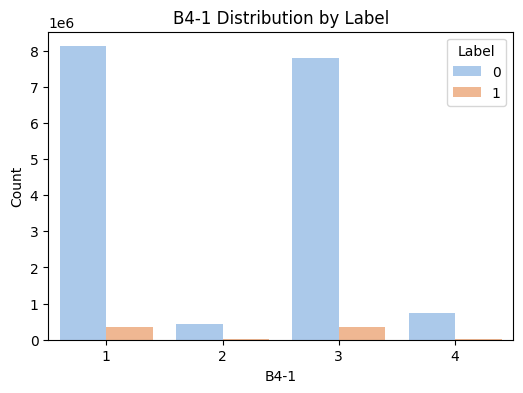

In [ ]:
# B4-1 - Label
plt.figure(figsize=(6,4))
sns.countplot(data=b4, x='B4-1', hue='Label', palette='pastel')
plt.title('B4-1 Distribution by Label')
plt.xlabel('B4-1')
plt.ylabel('Count')
plt.legend(title='Label')
plt.show()

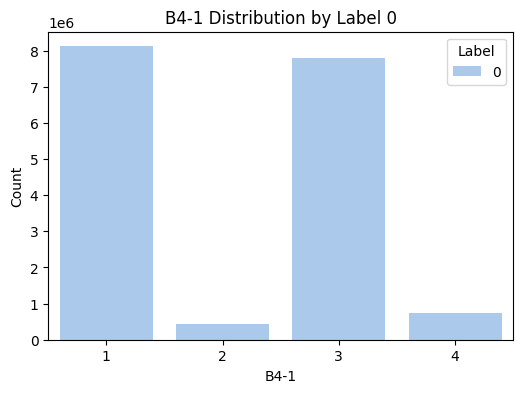

In [ ]:
 # B4-1 - Label 0
b4_label0 = b4[b4['Label'] == 0]

plt.figure(figsize=(6,4))
sns.countplot(data=b4_label0, x='B4-1', hue='Label', palette='pastel')
plt.title('B4-1 Distribution by Label 0')
plt.xlabel('B4-1')
plt.ylabel('Count')
plt.legend(title='Label')
plt.show()

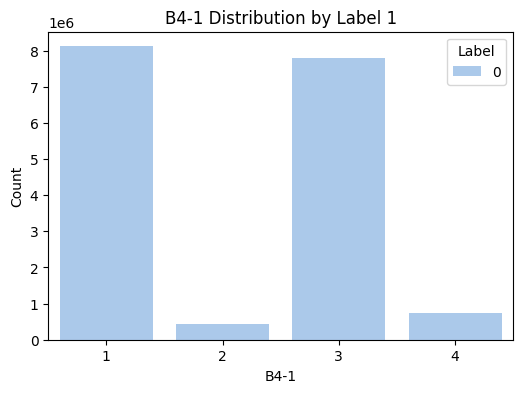

In [ ]:
 # B4-1 - Label 1
b4_label1 = b4[b4['Label'] == 1]

plt.figure(figsize=(6,4))
sns.countplot(data=b4_label0, x='B4-1', hue='Label', palette='pastel')
plt.title('B4-1 Distribution by Label 1')
plt.xlabel('B4-1')
plt.ylabel('Count')
plt.legend(title='Label')
plt.show()

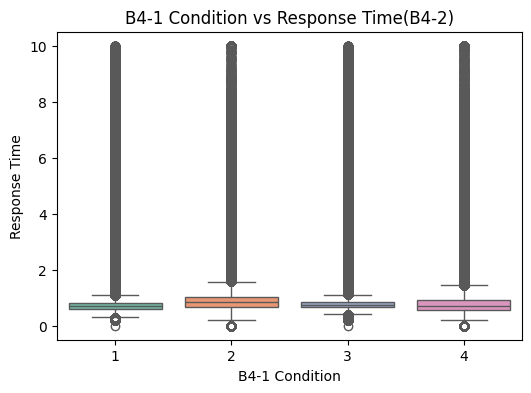

In [ ]:
plt.figure(figsize=(6,4))
sns.boxplot(data=b4, x='B4-1', y='B4-2', palette='Set2')
plt.title('B4-1 Condition vs Response Time(B4-2)')
plt.xlabel('B4-1 Condition')
plt.ylabel('Response Time')
plt.show()

In [ ]:
b4['B4-2'] = b4['B4-2'].astype(float)
summary_b4 = b4.groupby("B4-1")["B4-2"].describe().T
display(summary_b4)

B4-1,1,2,3,4
count,8.477953e+06,447737.000000,8.155413e+06,770277.000000
mean,7.400749e-01,1.046930,8.113124e-01,0.888688
std,3.072934e-01,1.154467,3.238798e-01,0.927569
min,0.000000e+00,0.000000,0.000000e+00,0.000000
25%,6.000000e-01,0.670000,6.700000e-01,0.570000
50%,6.900000e-01,0.830000,7.500000e-01,0.720000
75%,8.000000e-01,1.030000,8.500000e-01,0.920000
max,1.000000e+01,10.000000,1.000000e+01,10.000000


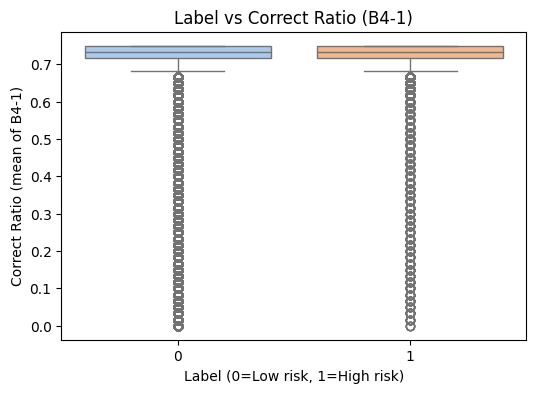

In [ ]:
# 참가자 단위로 평균 정답률 계산
train_b4['B4-1_ratio'] = train_b4['B4-1'].apply(lambda x: (x.count(1) + x.count(3))/len(x))

plt.figure(figsize=(6,4))
sns.boxplot(data=train_b4, x='Label', y='B4-1_ratio', palette='pastel')
plt.title('Label vs Correct Ratio (B4-1)')
plt.xlabel('Label (0=Low risk, 1=High risk)')
plt.ylabel('Correct Ratio (mean of B4-1)')
plt.show()

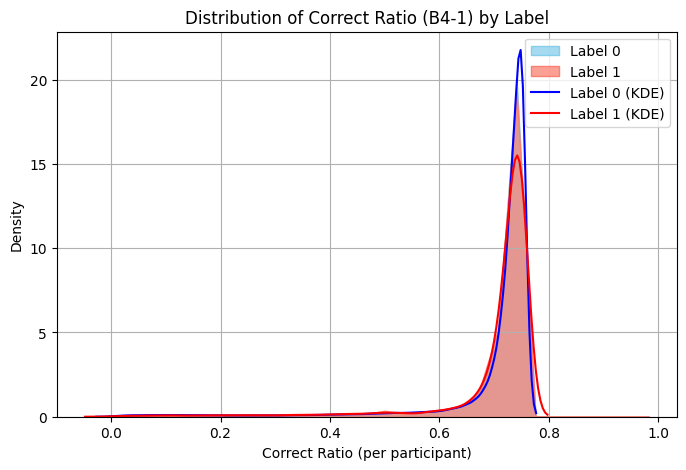

In [ ]:
# KDE Plot
bins = np.linspace(0, 1, 30)

plt.figure(figsize=(8,5))
sns.histplot(train_b4[train_b4['Label'] == 0]['B4-1_ratio'], bins=bins, kde=False, stat='density', color='skyblue', label='Label 0', element='poly')
sns.histplot(train_b4[train_b4['Label'] == 1]['B4-1_ratio'], bins=bins, kde=False, stat='density', color='salmon', label='Label 1', element='poly')

sns.kdeplot(train_b4[train_b4['Label'] == 0]['B4-1_ratio'], color='blue', label='Label 0 (KDE)')
sns.kdeplot(train_b4[train_b4['Label'] == 1]['B4-1_ratio'], color='red', label='Label 1 (KDE)')

plt.title('Distribution of Correct Ratio (B4-1) by Label')
plt.xlabel('Correct Ratio (per participant)')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.show()

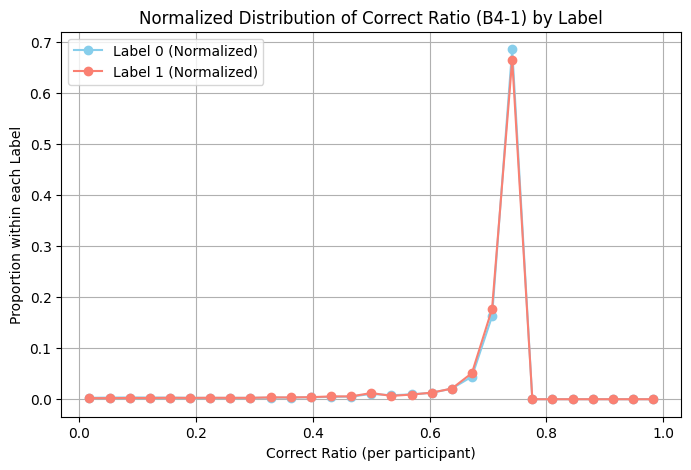

In [ ]:
# Normalized
counts_0, _ = np.histogram(train_b4[train_b4['Label']==0]['B4-1_ratio'], bins=bins)
counts_1, _ = np.histogram(train_b4[train_b4['Label']==1]['B4-1_ratio'], bins=bins)
counts_0 = counts_0 / counts_0.sum()
counts_1 = counts_1 / counts_1.sum()
bin_centers = (bins[:-1]+bins[1:])/2

plt.figure(figsize=(8,5))
plt.plot(bin_centers, counts_0, marker='o', color='skyblue', label='Label 0 (Normalized)')
plt.plot(bin_centers, counts_1, marker='o', color='salmon', label='Label 1 (Normalized)')
plt.title('Normalized Distribution of Correct Ratio (B4-1) by Label')
plt.xlabel('Correct Ratio (per participant)')
plt.ylabel('Proportion within each Label')
plt.legend()
plt.grid(True)
plt.show()

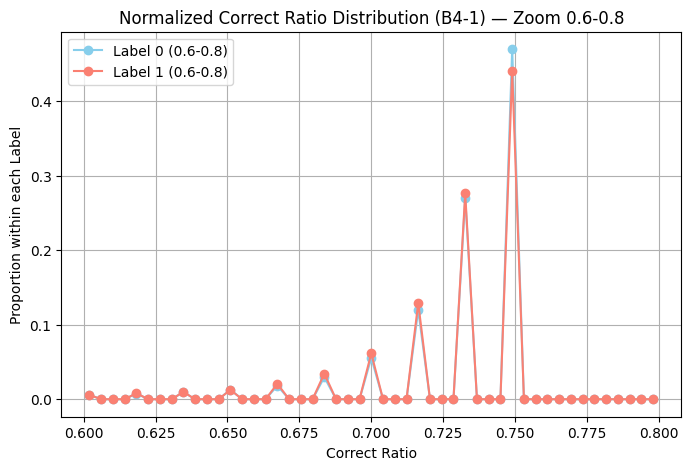

In [ ]:
bins_low = np.linspace(0.6, 0.8, 50)
c0_low, _ = np.histogram(train_b4[train_b4['Label'] == 0]['B4-1_ratio'].dropna(), bins=bins_low)
c1_low, _ = np.histogram(train_b4[train_b4['Label'] == 1]['B4-1_ratio'].dropna(), bins=bins_low)
c0_low = c0_low / c0_low.sum() if c0_low.sum()>0 else c0_low
c1_low = c1_low / c1_low.sum() if c1_low.sum()>0 else c1_low
centers_low = (bins_low[:-1] + bins_low[1:]) / 2

plt.figure(figsize=(8,5))
plt.plot(centers_low, c0_low, marker='o', color='skyblue', label='Label 0 (0.6-0.8)')
plt.plot(centers_low, c1_low, marker='o', color='salmon', label='Label 1 (0.6-0.8)')
plt.title('Normalized Correct Ratio Distribution (B4-1) — Zoom 0.6-0.8')
plt.xlabel('Correct Ratio')
plt.ylabel('Proportion within each Label')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
def extract_b4_features(df):
    df = df.copy()

    df['B4-1_correct_count'] = df['B4-1'].apply(lambda x: x.count(1) if isinstance(x, list) else np.nan)
    df['B4-1_incorrect_count'] = df['B4-1'].apply(lambda x: x.count(2) if isinstance(x, list) else np.nan)
    df['B4-1_total'] = df['B4-1'].apply(lambda x: len(x) if isinstance(x, list) else 0)
    df['B4-1_ratio'] = df.apply(lambda r: (r['B4-1_correct_count']/r['B4-1_total']) if r['B4-1_total']>0 else np.nan, axis=1)

    return df[['Label','B4-1_correct_count','B4-1_incorrect_count','B4-1_ratio']]

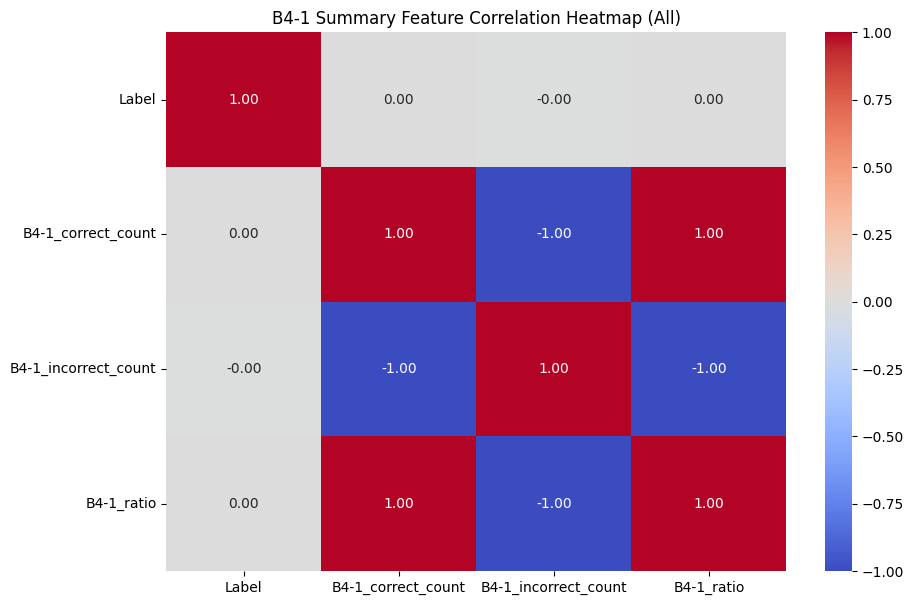

In [ ]:
b4_features = extract_b4_features(train_b4)
corr = b4_features.corr()

plt.figure(figsize=(10,7))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', center=0)
plt.title("B4-1 Summary Feature Correlation Heatmap (All)")
plt.show()

## B5 Test

In [ ]:
train_b5 = train_b[['Label', 'B5-1', 'B5-2']]
train_b5.head()

,Label,B5-1,B5-2
0,0,"1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1","4.27,5.11,5.84,5.47,4.50,5.74,5.54,5.39,5.93,6..."
1,0,"1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1","2.56,2.80,3.11,5.71,3.68,10.55,3.58,2.81,5.81,..."
2,0,"1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1","2.67,2.90,3.85,3.62,4.00,5.12,5.27,4.99,6.16,1..."
3,0,"1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1","4.75,3.45,8.54,3.81,3.87,7.47,3.44,10.54,5.23,..."
4,0,"1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1","5.36,5.44,5.76,5.42,5.19,7.04,4.92,3.97,6.96,8..."


In [ ]:
train_b5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297526 entries, 0 to 297525
Data columns (total 3 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   Label   297526 non-null  int64 
 1   B5-1    297523 non-null  object
 2   B5-2    297523 non-null  object
dtypes: int64(1), object(2)
memory usage: 6.8+ MB


In [ ]:
train_b5 = train_b5.dropna()
train_b5.info()

<class 'pandas.core.frame.DataFrame'>
Index: 297523 entries, 0 to 297525
Data columns (total 3 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   Label   297523 non-null  int64 
 1   B5-1    297523 non-null  object
 2   B5-2    297523 non-null  object
dtypes: int64(1), object(2)
memory usage: 9.1+ MB


In [ ]:
# 20 trials -> list
train_b5['B5-1'] = train_b5['B5-1'].apply(lambda x: list(map(int, x.split(','))))
train_b5['B5-2'] = train_b5['B5-2'].apply(lambda x: list(map(float, x.split(','))))

In [ ]:
b5 = train_b5[['B5-1','B5-2','Label']].explode(['B5-1','B5-2']).copy()

### B5-1

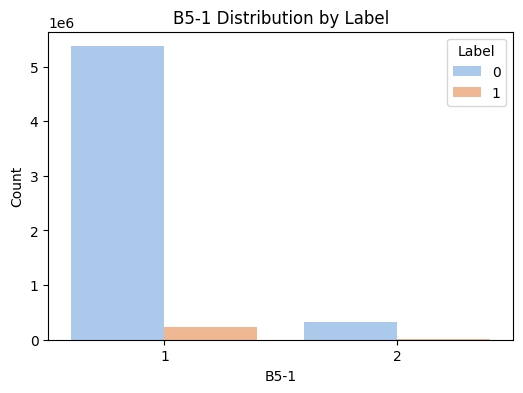

In [ ]:
# B5-1 - Label
plt.figure(figsize=(6,4))
sns.countplot(data=b5, x='B5-1', hue='Label', palette='pastel')
plt.title('B5-1 Distribution by Label')
plt.xlabel('B5-1')
plt.ylabel('Count')
plt.legend(title='Label')
plt.show()

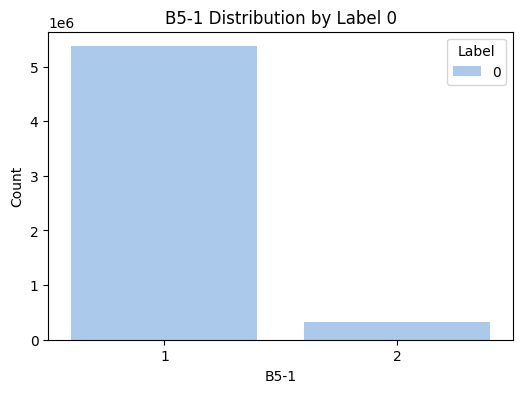

In [ ]:
 # B5-1 - Label 0
b5_label0 = b5[b5['Label'] == 0]

plt.figure(figsize=(6,4))
sns.countplot(data=b5_label0, x='B5-1', hue='Label', palette='pastel')
plt.title('B5-1 Distribution by Label 0')
plt.xlabel('B5-1')
plt.ylabel('Count')
plt.legend(title='Label')
plt.show()

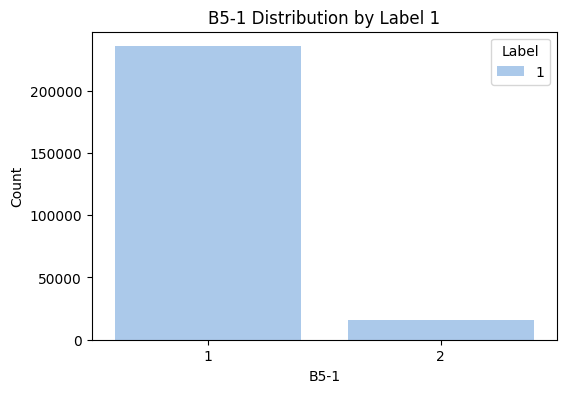

In [ ]:
 # B5-1 - Label 1
b5_label0 = b5[b5['Label'] == 1]

plt.figure(figsize=(6,4))
sns.countplot(data=b5_label0, x='B5-1', hue='Label', palette='pastel')
plt.title('B5-1 Distribution by Label 1')
plt.xlabel('B5-1')
plt.ylabel('Count')
plt.legend(title='Label')
plt.show()

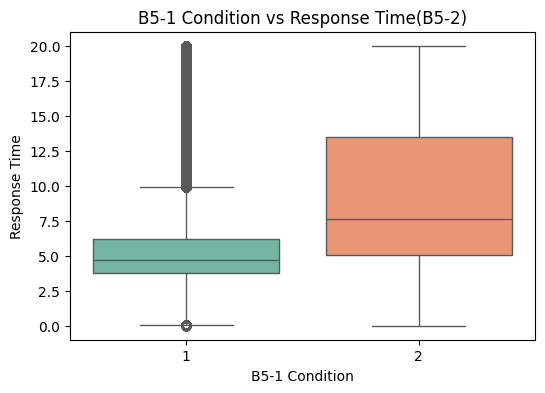

In [ ]:
plt.figure(figsize=(6,4))
sns.boxplot(data=b5, x='B5-1', y='B5-2', palette='Set2')
plt.title('B5-1 Condition vs Response Time(B5-2)')
plt.xlabel('B5-1 Condition')
plt.ylabel('Response Time')
plt.show()

In [ ]:
b5['B5-2'] = b5['B5-2'].astype(float)
summary_b5 = b5.groupby("B5-1")["B5-2"].describe().T
display(summary_b5)

B5-1,1,2
count,5.606168e+06,344292.000000
mean,5.397588e+00,9.616291
std,2.527388e+00,5.982201
min,1.000000e-02,0.000000
25%,3.740000e+00,5.070000
50%,4.670000e+00,7.610000
75%,6.210000e+00,13.510000
max,2.000000e+01,20.000000


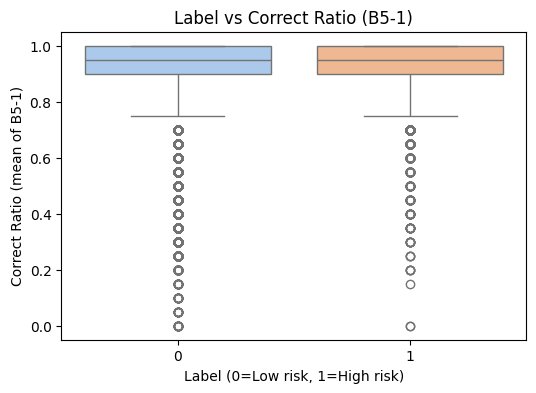

In [ ]:
# 참가자 단위로 평균 정답률 계산
train_b5['B5-1_ratio'] = train_b5['B5-1'].apply(lambda x: x.count(1)/len(x))

plt.figure(figsize=(6,4))
sns.boxplot(data=train_b5, x='Label', y='B5-1_ratio', palette='pastel')
plt.title('Label vs Correct Ratio (B5-1)')
plt.xlabel('Label (0=Low risk, 1=High risk)')
plt.ylabel('Correct Ratio (mean of B5-1)')
plt.show()

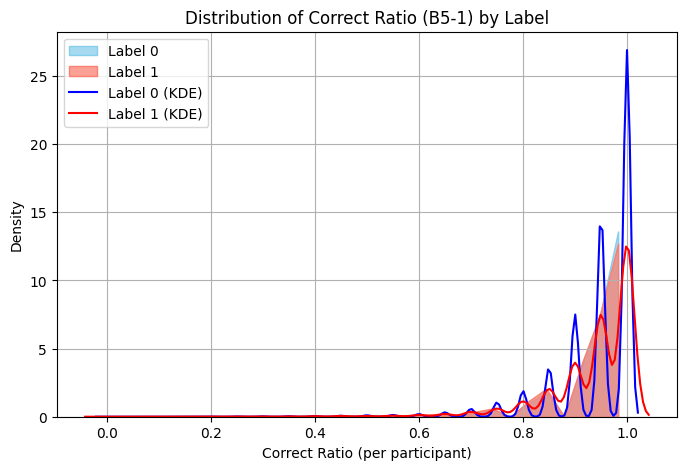

In [ ]:
# KDE Plot
bins = np.linspace(0, 1, 30)

plt.figure(figsize=(8,5))
sns.histplot(train_b5[train_b5['Label'] == 0]['B5-1_ratio'], bins=bins, kde=False, stat='density', color='skyblue', label='Label 0', element='poly')
sns.histplot(train_b5[train_b5['Label'] == 1]['B5-1_ratio'], bins=bins, kde=False, stat='density', color='salmon', label='Label 1', element='poly')

sns.kdeplot(train_b5[train_b5['Label'] == 0]['B5-1_ratio'], color='blue', label='Label 0 (KDE)')
sns.kdeplot(train_b5[train_b5['Label'] == 1]['B5-1_ratio'], color='red', label='Label 1 (KDE)')

plt.title('Distribution of Correct Ratio (B5-1) by Label')
plt.xlabel('Correct Ratio (per participant)')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.show()

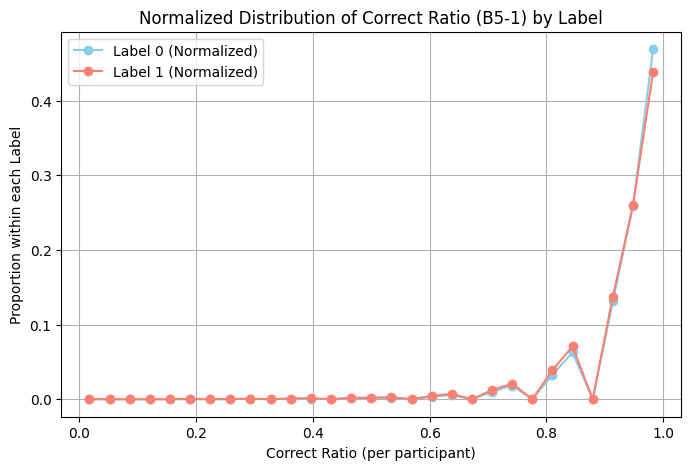

In [ ]:
# Normalized
counts_0, _ = np.histogram(train_b5[train_b5['Label']==0]['B5-1_ratio'], bins=bins)
counts_1, _ = np.histogram(train_b5[train_b5['Label']==1]['B5-1_ratio'], bins=bins)
counts_0 = counts_0 / counts_0.sum()
counts_1 = counts_1 / counts_1.sum()
bin_centers = (bins[:-1]+bins[1:])/2

plt.figure(figsize=(8,5))
plt.plot(bin_centers, counts_0, marker='o', color='skyblue', label='Label 0 (Normalized)')
plt.plot(bin_centers, counts_1, marker='o', color='salmon', label='Label 1 (Normalized)')
plt.title('Normalized Distribution of Correct Ratio (B5-1) by Label')
plt.xlabel('Correct Ratio (per participant)')
plt.ylabel('Proportion within each Label')
plt.legend()
plt.grid(True)
plt.show()

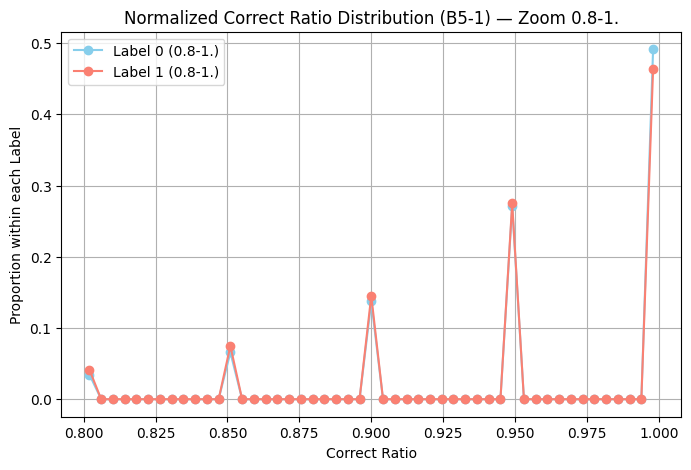

In [ ]:
bins_low = np.linspace(0.8, 1., 50)
c0_low, _ = np.histogram(train_b5[train_b5['Label'] == 0]['B5-1_ratio'].dropna(), bins=bins_low)
c1_low, _ = np.histogram(train_b5[train_b5['Label'] == 1]['B5-1_ratio'].dropna(), bins=bins_low)
c0_low = c0_low / c0_low.sum() if c0_low.sum()>0 else c0_low
c1_low = c1_low / c1_low.sum() if c1_low.sum()>0 else c1_low
centers_low = (bins_low[:-1] + bins_low[1:]) / 2

plt.figure(figsize=(8,5))
plt.plot(centers_low, c0_low, marker='o', color='skyblue', label='Label 0 (0.8-1.)')
plt.plot(centers_low, c1_low, marker='o', color='salmon', label='Label 1 (0.8-1.)')
plt.title('Normalized Correct Ratio Distribution (B5-1) — Zoom 0.8-1.')
plt.xlabel('Correct Ratio')
plt.ylabel('Proportion within each Label')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
def extract_b5_features(df):
    df = df.copy()

    df['B5-1_correct_count'] = df['B5-1'].apply(lambda x: x.count(1) if isinstance(x, list) else np.nan)
    df['B5-1_incorrect_count'] = df['B5-1'].apply(lambda x: x.count(2) if isinstance(x, list) else np.nan)
    df['B5-1_total'] = df['B5-1'].apply(lambda x: len(x) if isinstance(x, list) else 0)
    df['B5-1_ratio'] = df.apply(lambda r: (r['B5-1_correct_count']/r['B5-1_total']) if r['B5-1_total']>0 else np.nan, axis=1)

    return df[['Label','B5-1_correct_count','B5-1_incorrect_count','B5-1_ratio']]

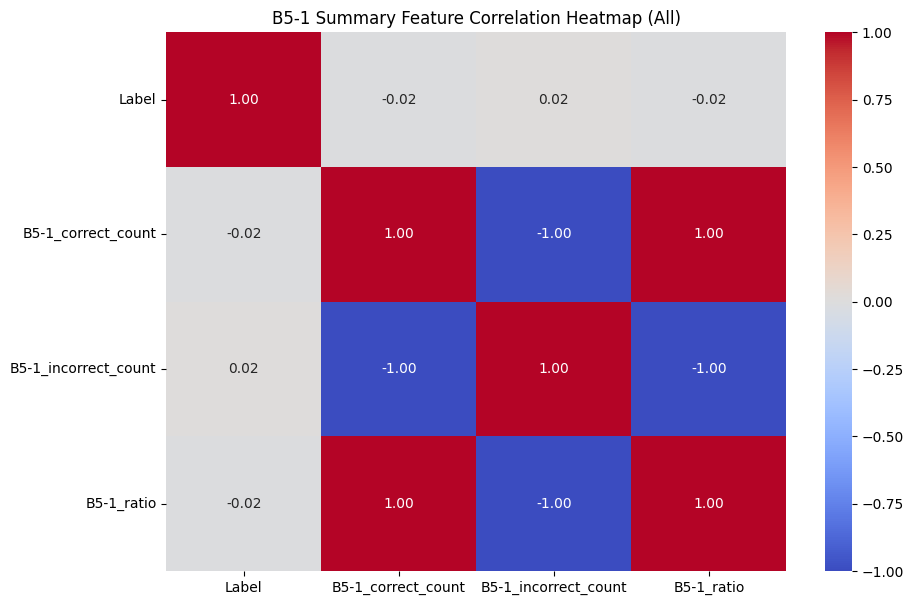

In [ ]:
b5_features = extract_b5_features(train_b5)
corr = b5_features.corr()

plt.figure(figsize=(10,7))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', center=0)
plt.title("B5-1 Summary Feature Correlation Heatmap (All)")
plt.show()

## **B6 Test**

In [ ]:
train_b6 = train_b[['Label', 'Age', 'B6']]
train_b6.head()

,Label,Age,B6
0,0,60b,"1,1,1,1,1,1,1,1,1,1,1,1,1,1,1"
1,0,60b,"1,1,1,1,1,1,1,1,1,1,1,1,1,1,1"
2,0,60b,"1,1,1,1,1,1,1,1,2,1,1,1,1,1,1"
3,0,70b,"1,1,1,1,1,2,1,1,1,1,1,1,1,1,1"
4,0,70a,"1,1,1,1,1,1,1,1,1,1,1,2,1,1,1"


In [ ]:
train_b6.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297526 entries, 0 to 297525
Data columns (total 3 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   Label   297526 non-null  int64 
 1   Age     297526 non-null  object
 2   B6      297523 non-null  object
dtypes: int64(1), object(2)
memory usage: 6.8+ MB


In [ ]:
train_b6 = train_b6.dropna()
train_b6.info()

<class 'pandas.core.frame.DataFrame'>
Index: 297523 entries, 0 to 297525
Data columns (total 3 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   Label   297523 non-null  int64 
 1   Age     297523 non-null  object
 2   B6      297523 non-null  object
dtypes: int64(1), object(2)
memory usage: 9.1+ MB


In [ ]:
train_b6['B6'] = train_b6['B6'].apply(lambda x: x.split(',').count('1'))

### B6

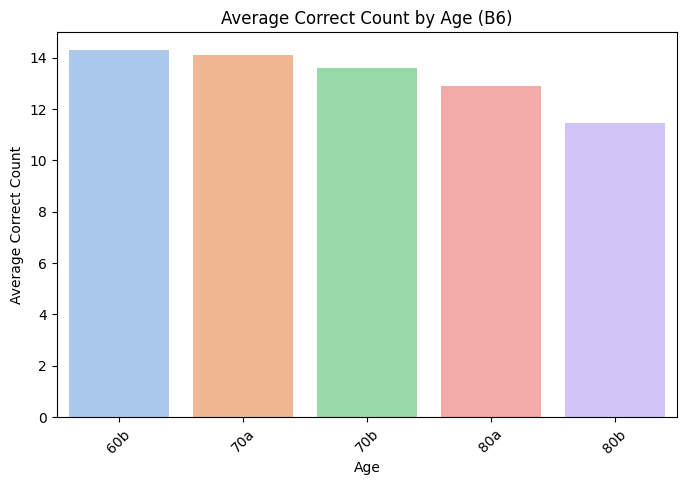

In [ ]:
# 연령대 별 맞춘 문제 개수의 평균
age_mean = train_b6.groupby('Age')['B6'].mean().reset_index()

plt.figure(figsize=(8,5))
sns.barplot(data=age_mean, x='Age', y='B6', palette='pastel')
plt.title('Average Correct Count by Age (B6)')
plt.xlabel('Age')
plt.ylabel('Average Correct Count')
plt.xticks(rotation=45)
plt.show()

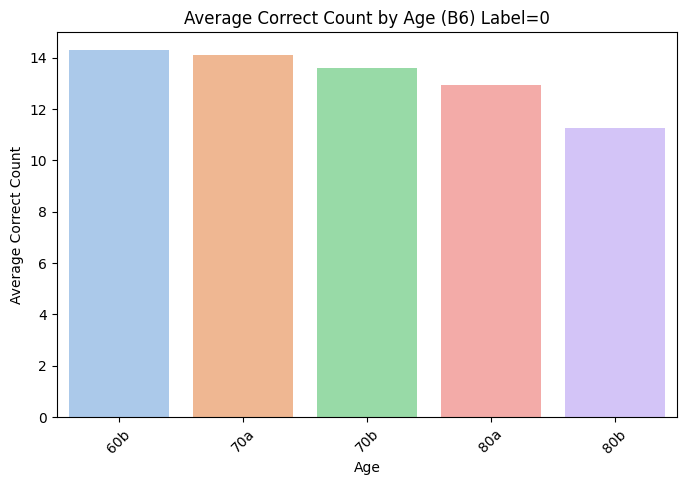

In [ ]:
age_mean = train_b6[train_b6['Label'] == 0].groupby('Age')['B6'].mean().reset_index()

plt.figure(figsize=(8,5))
sns.barplot(data=age_mean, x='Age', y='B6', palette='pastel')
plt.title('Average Correct Count by Age (B6) Label=0')
plt.xlabel('Age')
plt.ylabel('Average Correct Count')
plt.xticks(rotation=45)
plt.show()

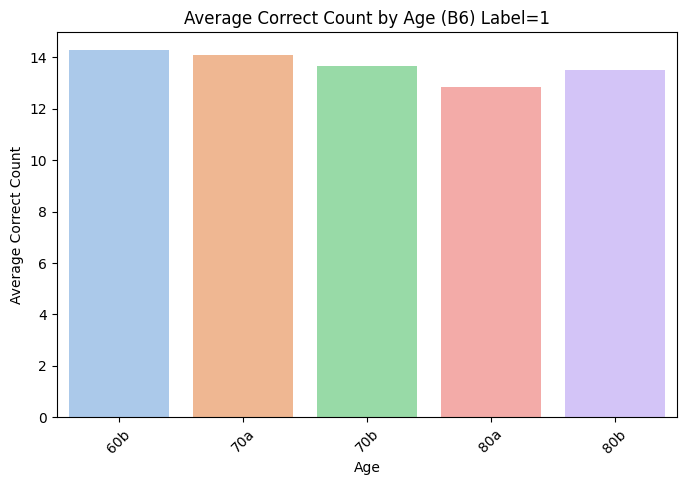

In [ ]:
age_mean = train_b6[train_b6['Label'] == 1].groupby('Age')['B6'].mean().reset_index()

plt.figure(figsize=(8,5))
sns.barplot(data=age_mean, x='Age', y='B6', palette='pastel')
plt.title('Average Correct Count by Age (B6) Label=1')
plt.xlabel('Age')
plt.ylabel('Average Correct Count')
plt.xticks(rotation=45)
plt.show()

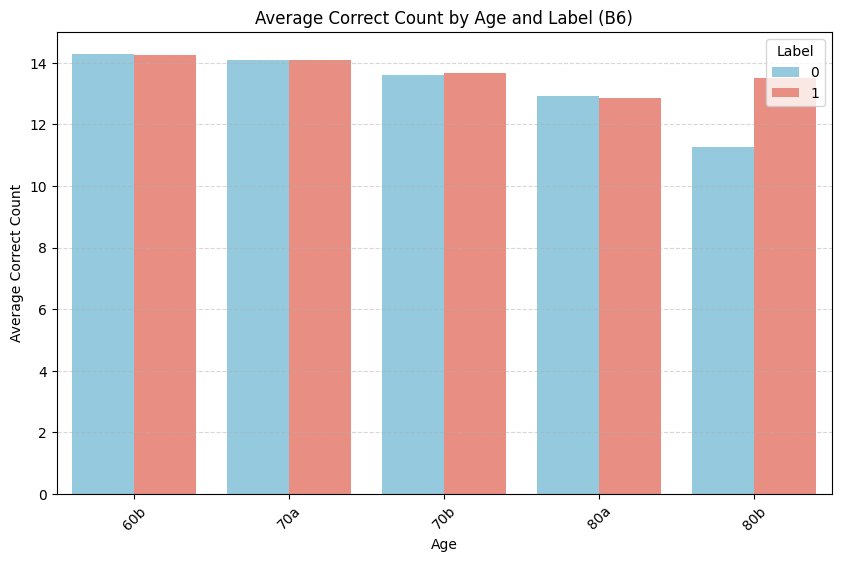

In [ ]:
age_label_mean = train_b6.groupby(['Age', 'Label'])['B6'].mean().reset_index()

plt.figure(figsize=(10,6))
sns.barplot(data=age_label_mean, x='Age', y='B6', hue='Label', palette=['skyblue','salmon'])
plt.title('Average Correct Count by Age and Label (B6)')
plt.xlabel('Age')
plt.ylabel('Average Correct Count')
plt.xticks(rotation=45)
plt.legend(title='Label')
plt.grid(True, axis='y', linestyle='--', alpha=0.5)
plt.show()

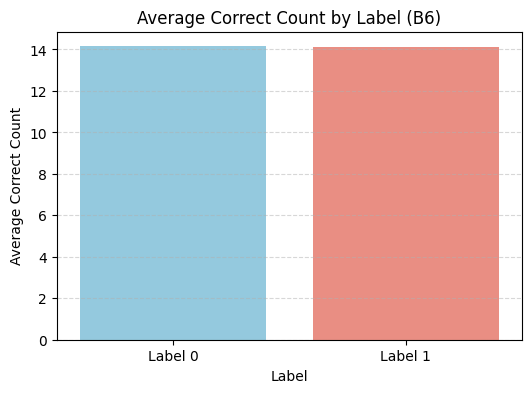

In [ ]:
# Label별 평균 맞춘 문제 수 계산
label_mean = train_b6.groupby('Label')['B6'].mean().reset_index()

plt.figure(figsize=(6,4))
sns.barplot(data=label_mean, x='Label', y='B6', palette=['skyblue','salmon'])
plt.title('Average Correct Count by Label (B6)')
plt.xlabel('Label')
plt.ylabel('Average Correct Count')
plt.xticks([0,1], ['Label 0', 'Label 1'])
plt.grid(True, axis='y', linestyle='--', alpha=0.5)
plt.show()


In [ ]:
summary_b6 = train_b6.groupby('Label')['B6'].describe().T
display(summary_b6)

Label,0,1
count,284933.000000,12590.000000
mean,14.149737,14.141700
std,1.491555,1.476837
min,0.000000,0.000000
25%,14.000000,14.000000
50%,15.000000,15.000000
75%,15.000000,15.000000
max,15.000000,15.000000


### Correlation

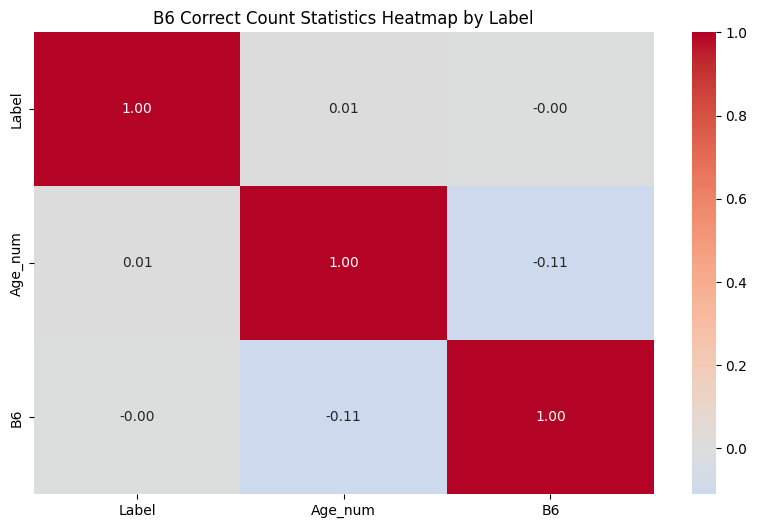

In [ ]:
train_b6['Age_num'] = train_b6['Age'].str.extract('(\d+)').astype(int)
corr = train_b6[['Label', 'Age_num', 'B6']].corr()

plt.figure(figsize=(10,6))

sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', center=0)
plt.title("B6 Correct Count Statistics Heatmap by Label")
plt.show()

## **B7 Test**

In [ ]:
train_b7 = train_b[['Label', 'Age', 'B7']]
train_b7.head()

,Label,Age,B7
0,0,60b,"1,1,1,1,1,1,2,1,1,1,1,1,1,1,2"
1,0,60b,"1,1,1,1,1,1,1,1,1,1,1,1,1,1,2"
2,0,60b,"1,1,1,1,1,1,1,2,1,1,1,1,1,1,1"
3,0,70b,"1,1,1,2,1,1,1,1,1,1,1,1,1,1,1"
4,0,70a,"1,2,1,2,1,1,1,1,1,1,1,1,1,1,2"


In [ ]:
train_b7.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297526 entries, 0 to 297525
Data columns (total 3 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   Label   297526 non-null  int64 
 1   Age     297526 non-null  object
 2   B7      297524 non-null  object
dtypes: int64(1), object(2)
memory usage: 6.8+ MB


In [ ]:
train_b7 = train_b7.dropna()
train_b7.info()

<class 'pandas.core.frame.DataFrame'>
Index: 297524 entries, 0 to 297525
Data columns (total 3 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   Label   297524 non-null  int64 
 1   Age     297524 non-null  object
 2   B7      297524 non-null  object
dtypes: int64(1), object(2)
memory usage: 9.1+ MB


In [ ]:
train_b7['B7'] = train_b7['B7'].apply(lambda x: x.split(',').count('1'))

### B7

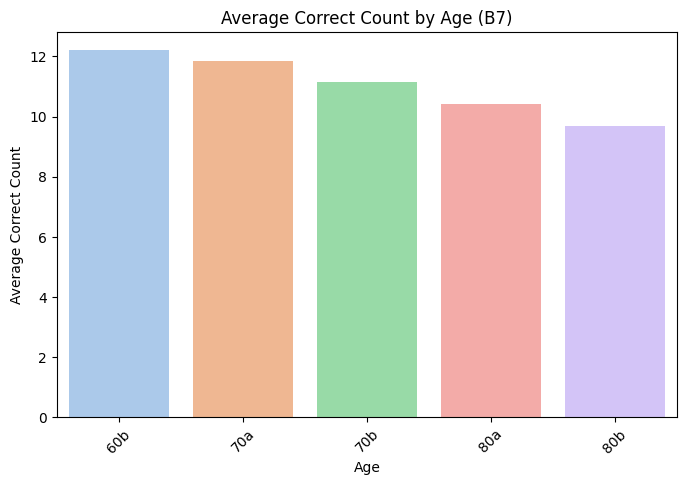

In [ ]:
# 연령대 별 맞춘 문제 개수의 평균
age_mean = train_b7.groupby('Age')['B7'].mean().reset_index()

plt.figure(figsize=(8,5))
sns.barplot(data=age_mean, x='Age', y='B7', palette='pastel')
plt.title('Average Correct Count by Age (B7)')
plt.xlabel('Age')
plt.ylabel('Average Correct Count')
plt.xticks(rotation=45)
plt.show()

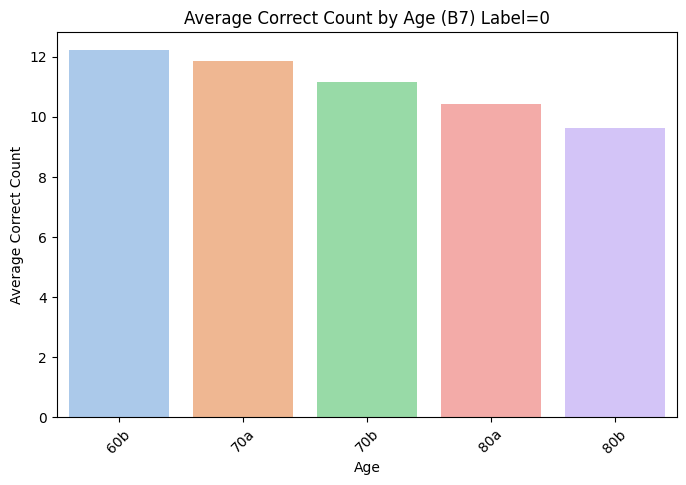

In [ ]:
age_mean = train_b7[train_b7['Label'] == 0].groupby('Age')['B7'].mean().reset_index()

plt.figure(figsize=(8,5))
sns.barplot(data=age_mean, x='Age', y='B7', palette='pastel')
plt.title('Average Correct Count by Age (B7) Label=0')
plt.xlabel('Age')
plt.ylabel('Average Correct Count')
plt.xticks(rotation=45)
plt.show()

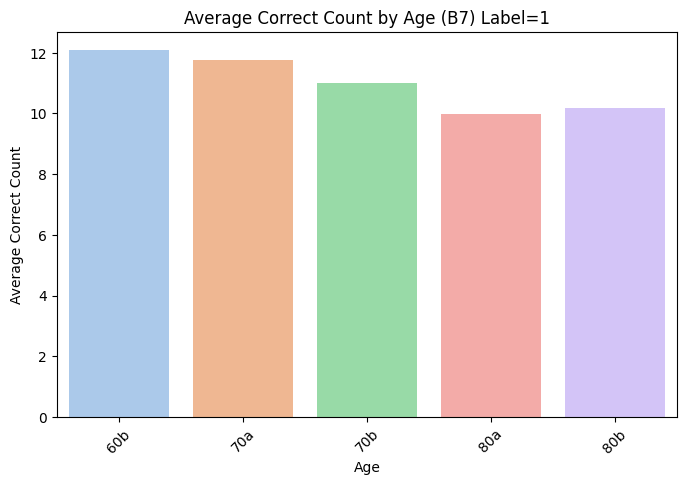

In [ ]:
age_mean = train_b7[train_b7['Label'] == 1].groupby('Age')['B7'].mean().reset_index()

plt.figure(figsize=(8,5))
sns.barplot(data=age_mean, x='Age', y='B7', palette='pastel')
plt.title('Average Correct Count by Age (B7) Label=1')
plt.xlabel('Age')
plt.ylabel('Average Correct Count')
plt.xticks(rotation=45)
plt.show()

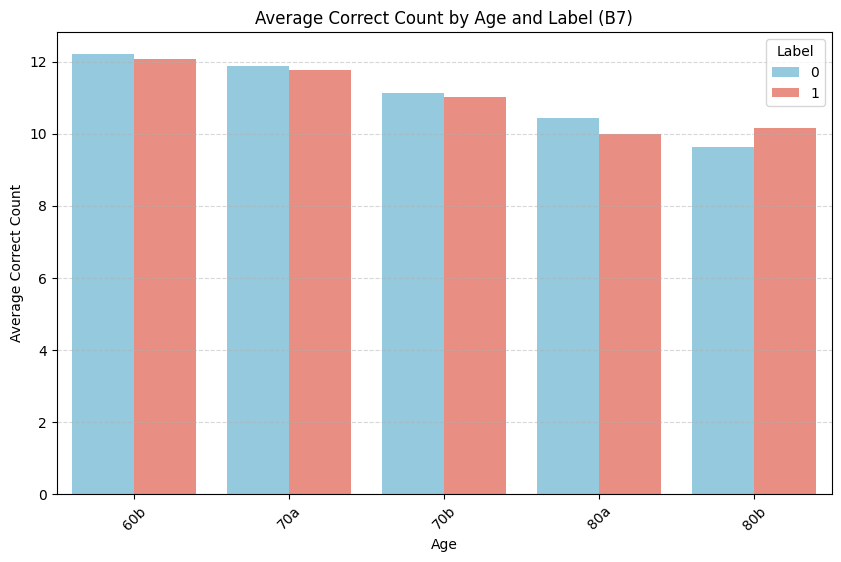

In [ ]:
age_label_mean = train_b7.groupby(['Age', 'Label'])['B7'].mean().reset_index()

plt.figure(figsize=(10,6))
sns.barplot(data=age_label_mean, x='Age', y='B7', hue='Label', palette=['skyblue','salmon'])
plt.title('Average Correct Count by Age and Label (B7)')
plt.xlabel('Age')
plt.ylabel('Average Correct Count')
plt.xticks(rotation=45)
plt.legend(title='Label')
plt.grid(True, axis='y', linestyle='--', alpha=0.5)
plt.show()

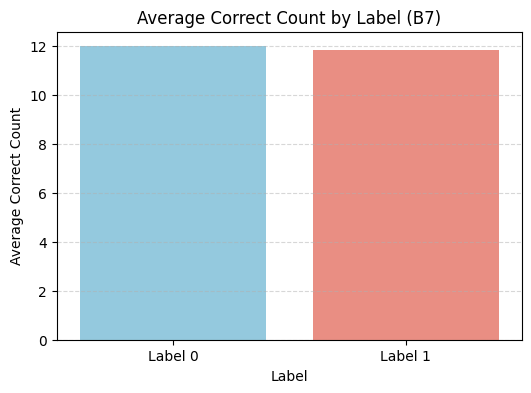

In [ ]:
# Label별 평균 맞춘 문제 수 계산
label_mean = train_b7.groupby('Label')['B7'].mean().reset_index()

plt.figure(figsize=(6,4))
sns.barplot(data=label_mean, x='Label', y='B7', palette=['skyblue','salmon'])
plt.title('Average Correct Count by Label (B7)')
plt.xlabel('Label')
plt.ylabel('Average Correct Count')
plt.xticks([0,1], ['Label 0', 'Label 1'])
plt.grid(True, axis='y', linestyle='--', alpha=0.5)
plt.show()


In [ ]:
summary_b7 = train_b7.groupby('Label')['B7'].describe().T
display(summary_b7)

Label,0,1
count,284934.000000,12590.000000
mean,11.985660,11.856394
std,2.206984,2.241556
min,0.000000,0.000000
25%,11.000000,11.000000
50%,12.000000,12.000000
75%,14.000000,14.000000
max,15.000000,15.000000


### Correlation

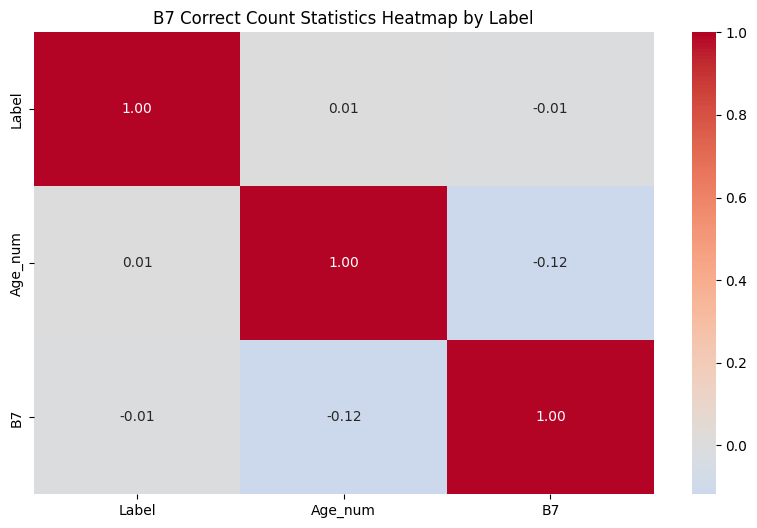

In [ ]:
train_b7['Age_num'] = train_b7['Age'].str.extract('(\d+)').astype(int)
corr = train_b7[['Label', 'Age_num', 'B7']].corr()

plt.figure(figsize=(10,6))

sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', center=0)
plt.title("B7 Correct Count Statistics Heatmap by Label")
plt.show()

## **B8 Test**

In [ ]:
train_b8 = train_b[['Label', 'Age', 'B8']]
train_b8.head()

,Label,Age,B8
0,0,60b,"1,1,1,1,1,1,1,1,1,1,1,1"
1,0,60b,"1,1,1,1,1,1,1,1,1,1,1,1"
2,0,60b,"1,1,1,1,1,1,1,1,1,1,1,1"
3,0,70b,"1,1,1,1,1,1,1,1,1,1,1,1"
4,0,70a,"1,1,1,1,1,1,1,1,1,1,1,1"


In [ ]:
train_b8.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297526 entries, 0 to 297525
Data columns (total 3 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   Label   297526 non-null  int64 
 1   Age     297526 non-null  object
 2   B8      297525 non-null  object
dtypes: int64(1), object(2)
memory usage: 6.8+ MB


In [ ]:
train_b8 = train_b8.dropna()
train_b8.info()

<class 'pandas.core.frame.DataFrame'>
Index: 297525 entries, 0 to 297525
Data columns (total 3 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   Label   297525 non-null  int64 
 1   Age     297525 non-null  object
 2   B8      297525 non-null  object
dtypes: int64(1), object(2)
memory usage: 9.1+ MB


In [ ]:
train_b8['B8'] = train_b8['B8'].apply(lambda x: x.split(',').count('1'))

### B8

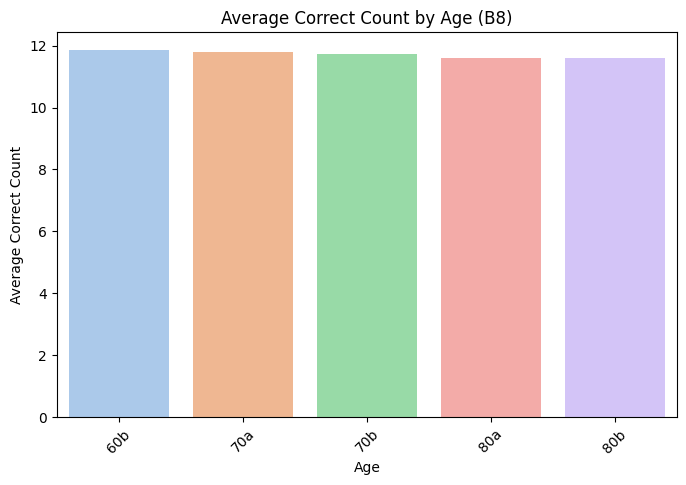

In [ ]:
# 연령대 별 맞춘 문제 개수의 평균
age_mean = train_b8.groupby('Age')['B8'].mean().reset_index()

plt.figure(figsize=(8,5))
sns.barplot(data=age_mean, x='Age', y='B8', palette='pastel')
plt.title('Average Correct Count by Age (B8)')
plt.xlabel('Age')
plt.ylabel('Average Correct Count')
plt.xticks(rotation=45)
plt.show()

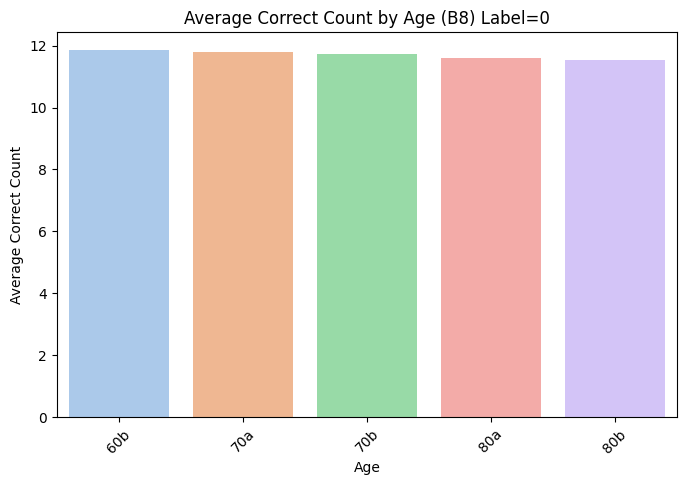

In [ ]:
age_mean = train_b8[train_b8['Label'] == 0].groupby('Age')['B8'].mean().reset_index()

plt.figure(figsize=(8,5))
sns.barplot(data=age_mean, x='Age', y='B8', palette='pastel')
plt.title('Average Correct Count by Age (B8) Label=0')
plt.xlabel('Age')
plt.ylabel('Average Correct Count')
plt.xticks(rotation=45)
plt.show()

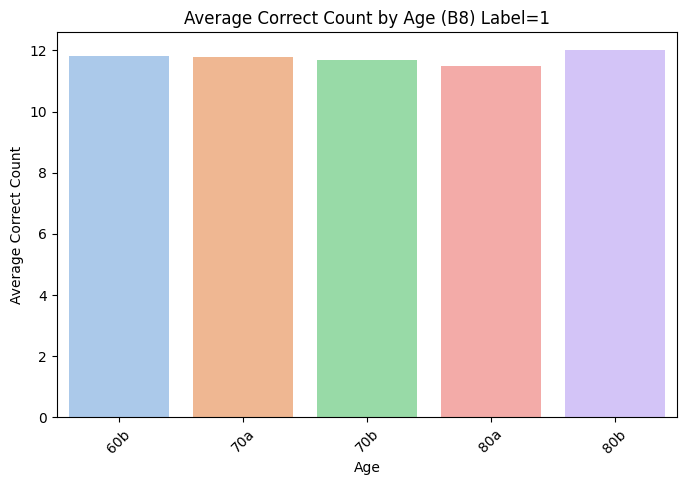

In [ ]:
age_mean = train_b8[train_b8['Label'] == 1].groupby('Age')['B8'].mean().reset_index()

plt.figure(figsize=(8,5))
sns.barplot(data=age_mean, x='Age', y='B8', palette='pastel')
plt.title('Average Correct Count by Age (B8) Label=1')
plt.xlabel('Age')
plt.ylabel('Average Correct Count')
plt.xticks(rotation=45)
plt.show()

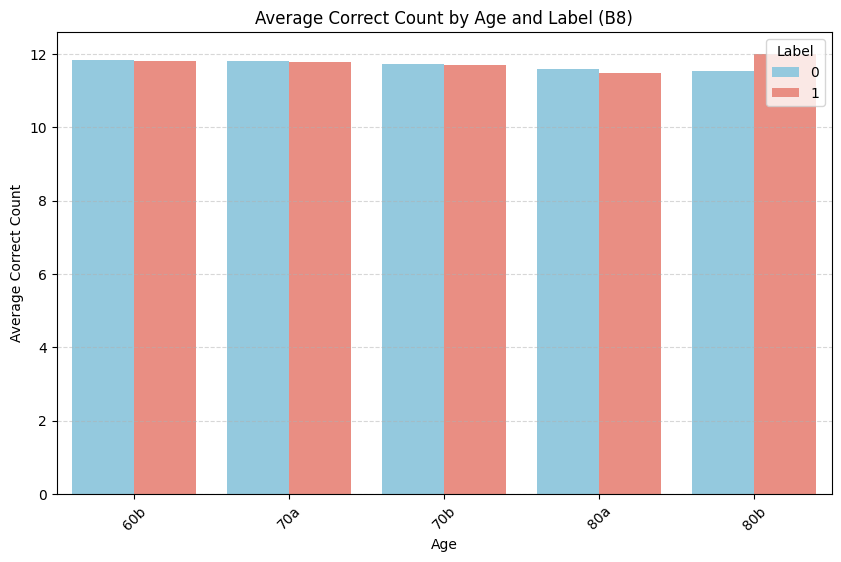

In [ ]:
age_label_mean = train_b8.groupby(['Age', 'Label'])['B8'].mean().reset_index()

plt.figure(figsize=(10,6))
sns.barplot(data=age_label_mean, x='Age', y='B8', hue='Label', palette=['skyblue','salmon'])
plt.title('Average Correct Count by Age and Label (B8)')
plt.xlabel('Age')
plt.ylabel('Average Correct Count')
plt.xticks(rotation=45)
plt.legend(title='Label')
plt.grid(True, axis='y', linestyle='--', alpha=0.5)
plt.show()

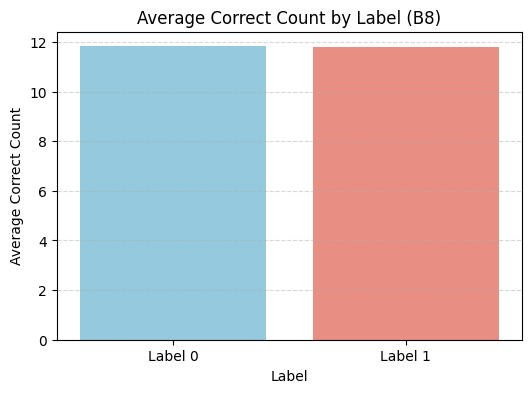

In [ ]:
# Label별 평균 맞춘 문제 수 계산
label_mean = train_b8.groupby('Label')['B8'].mean().reset_index()

plt.figure(figsize=(6,4))
sns.barplot(data=label_mean, x='Label', y='B8', palette=['skyblue','salmon'])
plt.title('Average Correct Count by Label (B8)')
plt.xlabel('Label')
plt.ylabel('Average Correct Count')
plt.xticks([0,1], ['Label 0', 'Label 1'])
plt.grid(True, axis='y', linestyle='--', alpha=0.5)
plt.show()


In [ ]:
summary_b8 = train_b8.groupby('Label')['B8'].describe().T
display(summary_b8)

Label,0,1
count,284935.000000,12590.000000
mean,11.817692,11.788403
std,0.513964,0.538479
min,0.000000,2.000000
25%,12.000000,12.000000
50%,12.000000,12.000000
75%,12.000000,12.000000
max,12.000000,12.000000


### Correlation

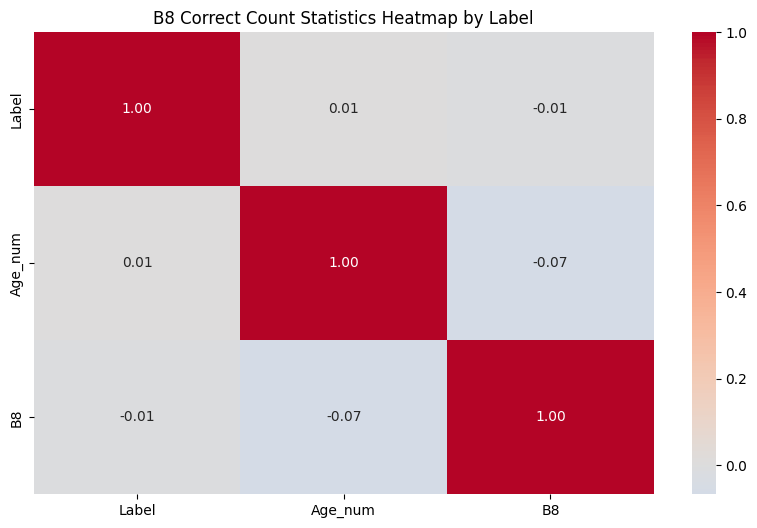

In [ ]:
train_b8['Age_num'] = train_b8['Age'].str.extract('(\d+)').astype(int)
corr = train_b8[['Label', 'Age_num', 'B8']].corr()

plt.figure(figsize=(10,6))

sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', center=0)
plt.title("B8 Correct Count Statistics Heatmap by Label")
plt.show()

## **B9 Test**

In [ ]:
train_b9 = train_b[['Label','B9-1', 'B9-2', 'B9-3', 'B9-4', 'B9-5']]
train_b9.head()

,Label,B9-1,B9-2,B9-3,B9-4,B9-5
0,0,15,0,1,34,0
1,0,15,0,0,35,0
2,0,15,0,1,34,1
3,0,15,0,0,35,0
4,0,15,0,2,33,0


In [ ]:
train_b9.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297526 entries, 0 to 297525
Data columns (total 6 columns):
 #   Column  Non-Null Count   Dtype
---  ------  --------------   -----
 0   Label   297526 non-null  int64
 1   B9-1    297526 non-null  int64
 2   B9-2    297526 non-null  int64
 3   B9-3    297526 non-null  int64
 4   B9-4    297526 non-null  int64
 5   B9-5    297526 non-null  int64
dtypes: int64(6)
memory usage: 13.6 MB


In [ ]:
# 기본 지표 계산
train_b9['aud_hit_rate'] = train_b9['B9-1'] / 15         # 목표자극 반응률
train_b9['aud_accuracy'] = (train_b9['B9-1'] + train_b9['B9-4']) / 50  # 청각 전체 정확도
train_b9['vis_error_rate'] = train_b9['B9-5'] / 32       # 시각 오류율
train_b9['B9_score'] = train_b9['aud_accuracy'] * (1 - train_b9['vis_error_rate'])  # 종합 점수

### B9-1 ~ B9-5

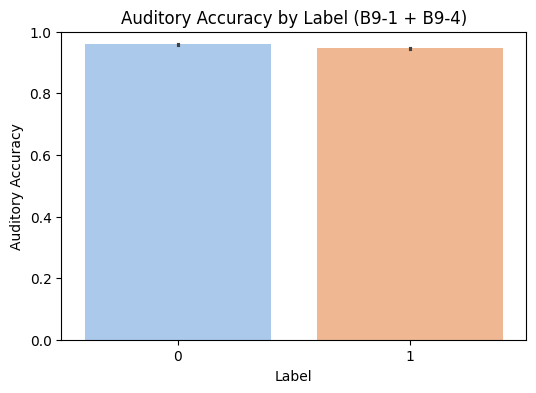

In [ ]:
# 청각 정확도 비교
plt.figure(figsize=(6,4))
sns.barplot(data=train_b9, x='Label', y='aud_accuracy', palette='pastel')
plt.title('Auditory Accuracy by Label (B9-1 + B9-4)')
plt.xlabel('Label')
plt.ylabel('Auditory Accuracy')
plt.ylim(0, 1)
plt.show()

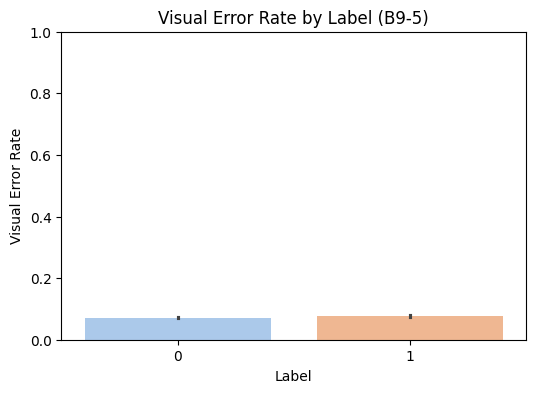

In [ ]:
# 시각 오류율 비교
plt.figure(figsize=(6,4))
sns.barplot(data=train_b9, x='Label', y='vis_error_rate', palette='pastel')
plt.title('Visual Error Rate by Label (B9-5)')
plt.xlabel('Label')
plt.ylabel('Visual Error Rate')
plt.ylim(0, 1)
plt.show()

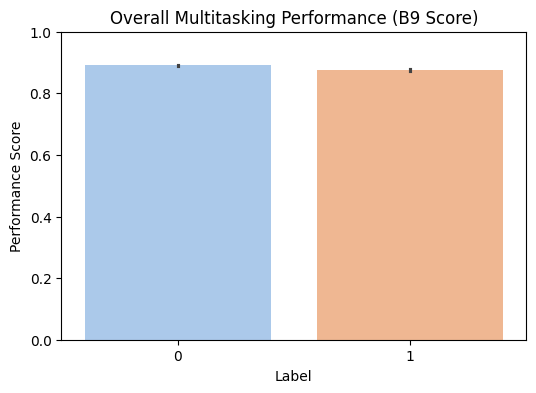

In [ ]:
# 전체 수행 점수 비교
plt.figure(figsize=(6,4))
sns.barplot(data=train_b9, x='Label', y='B9_score', palette='pastel')
plt.title('Overall Multitasking Performance (B9 Score)')
plt.xlabel('Label')
plt.ylabel('Performance Score')
plt.ylim(0, 1)
plt.show()

In [ ]:
b9_summary = train_b9.groupby('Label')[['aud_hit_rate', 'aud_accuracy', 'vis_error_rate', 'B9_score']].mean().round(3)
display(b9_summary)

,aud_hit_rate,aud_accuracy,vis_error_rate,B9_score
Label,,,,
0,0.919,0.959,0.072,0.891
1,0.890,0.947,0.077,0.875


### Correlation

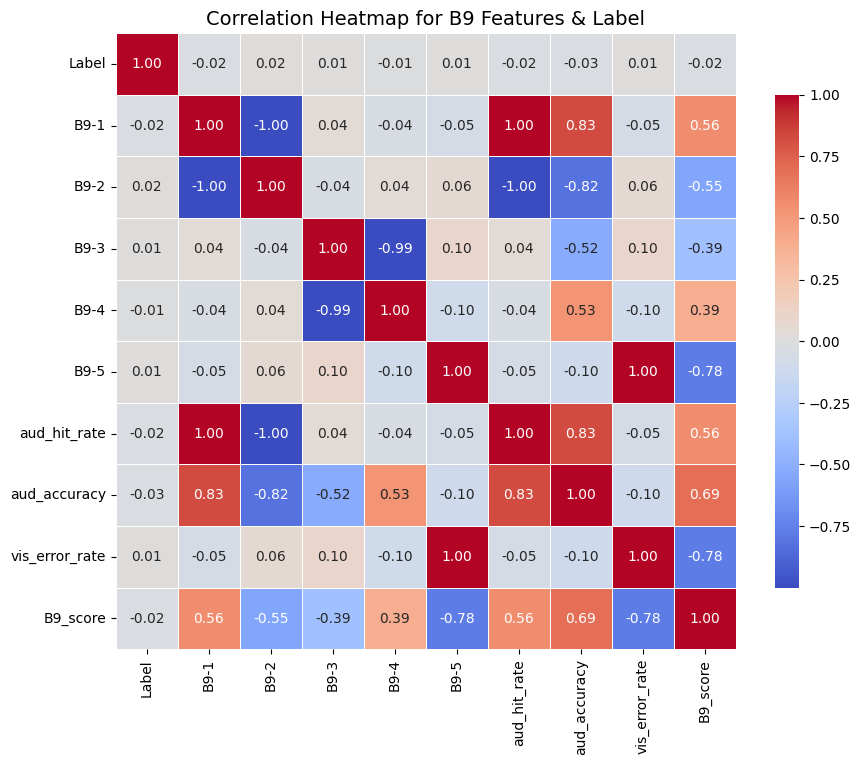

In [ ]:
corr = train_b9.corr(method='pearson')

plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', center=0,
            linewidths=0.5, cbar_kws={'shrink': 0.8})
plt.title('Correlation Heatmap for B9 Features & Label', fontsize=14)
plt.show()

## **B10 Test**

In [ ]:
train_b10 = train_b[['Label','B10-1', 'B10-2', 'B10-3', 'B10-4', 'B10-5', 'B10-6']]
train_b10.head()

,Label,B10-1,B10-2,B10-3,B10-4,B10-5,B10-6
0,0,20,0,2,58,0,20
1,0,20,0,1,59,3,20
2,0,20,0,1,59,2,18
3,0,18,2,0,60,5,19
4,0,20,0,0,60,0,19


In [ ]:
train_b10.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297526 entries, 0 to 297525
Data columns (total 7 columns):
 #   Column  Non-Null Count   Dtype
---  ------  --------------   -----
 0   Label   297526 non-null  int64
 1   B10-1   297526 non-null  int64
 2   B10-2   297526 non-null  int64
 3   B10-3   297526 non-null  int64
 4   B10-4   297526 non-null  int64
 5   B10-5   297526 non-null  int64
 6   B10-6   297526 non-null  int64
dtypes: int64(7)
memory usage: 15.9 MB


In [ ]:
train_b10['aud_hit_rate'] = train_b10['B10-1'] / 20
train_b10['aud_accuracy'] = (train_b10['B10-1'] + train_b10['B10-4']) / 80  # 전체 정확도
train_b10['vis1_error_rate'] = train_b10['B10-5'] / 52
train_b10['vis2_accuracy'] = train_b10['B10-6'] / 20

# 종합 점수 (가중치 없이 단순 평균)
train_b10['B10_score'] = (train_b10['aud_accuracy'] + train_b10['vis2_accuracy'] - train_b10['vis1_error_rate']) / 3

### B10-1 ~ B10-6

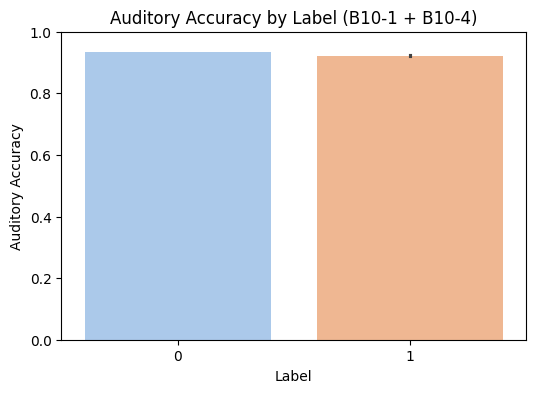

In [ ]:
# 청각 정확도 비교
plt.figure(figsize=(6,4))
sns.barplot(data=train_b10, x='Label', y='aud_accuracy', palette='pastel')
plt.title('Auditory Accuracy by Label (B10-1 + B10-4)')
plt.xlabel('Label')
plt.ylabel('Auditory Accuracy')
plt.ylim(0, 1)
plt.show()

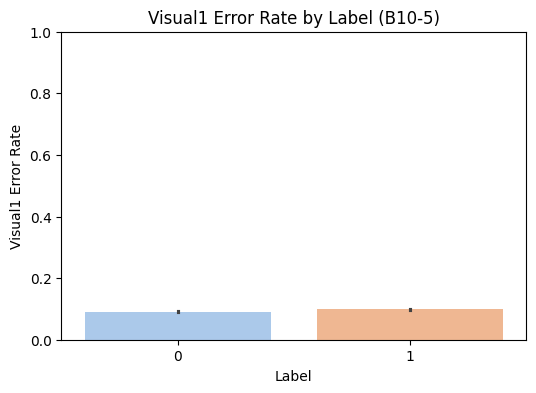

In [ ]:
# 시각 1 오류율 비교
plt.figure(figsize=(6,4))
sns.barplot(data=train_b10, x='Label', y='vis1_error_rate', palette='pastel')
plt.title('Visual1 Error Rate by Label (B10-5)')
plt.xlabel('Label')
plt.ylabel('Visual1 Error Rate')
plt.ylim(0, 1)
plt.show()

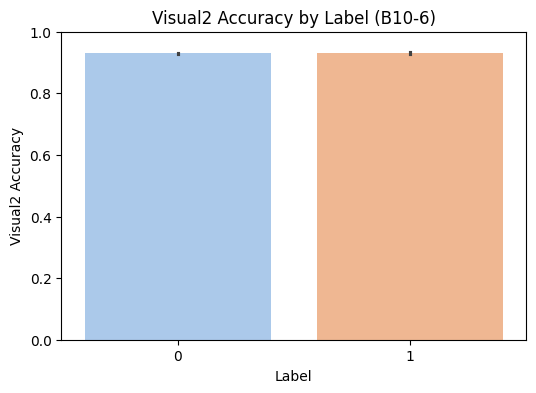

In [ ]:
# 시각 2 정확도 비교
plt.figure(figsize=(6,4))
sns.barplot(data=train_b10, x='Label', y='vis2_accuracy', palette='pastel')
plt.title('Visual2 Accuracy by Label (B10-6)')
plt.xlabel('Label')
plt.ylabel('Visual2 Accuracy')
plt.ylim(0, 1)
plt.show()

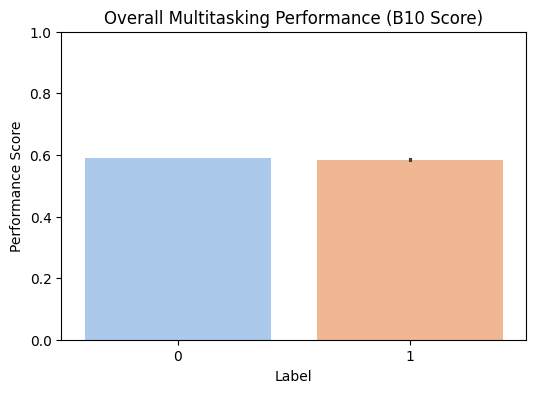

In [ ]:
# 전체 수행 점수 비교
plt.figure(figsize=(6,4))
sns.barplot(data=train_b10, x='Label', y='B10_score', palette='pastel')
plt.title('Overall Multitasking Performance (B10 Score)')
plt.xlabel('Label')
plt.ylabel('Performance Score')
plt.ylim(0, 1)
plt.show()

In [ ]:
b10_summary = train_b10.groupby('Label')[['aud_hit_rate','aud_accuracy','vis1_error_rate','vis2_accuracy','B10_score']].mean().round(3)
display(b10_summary)

,aud_hit_rate,aud_accuracy,vis1_error_rate,vis2_accuracy,B10_score
Label,,,,,
0,0.863,0.934,0.091,0.93,0.591
1,0.831,0.922,0.099,0.93,0.585


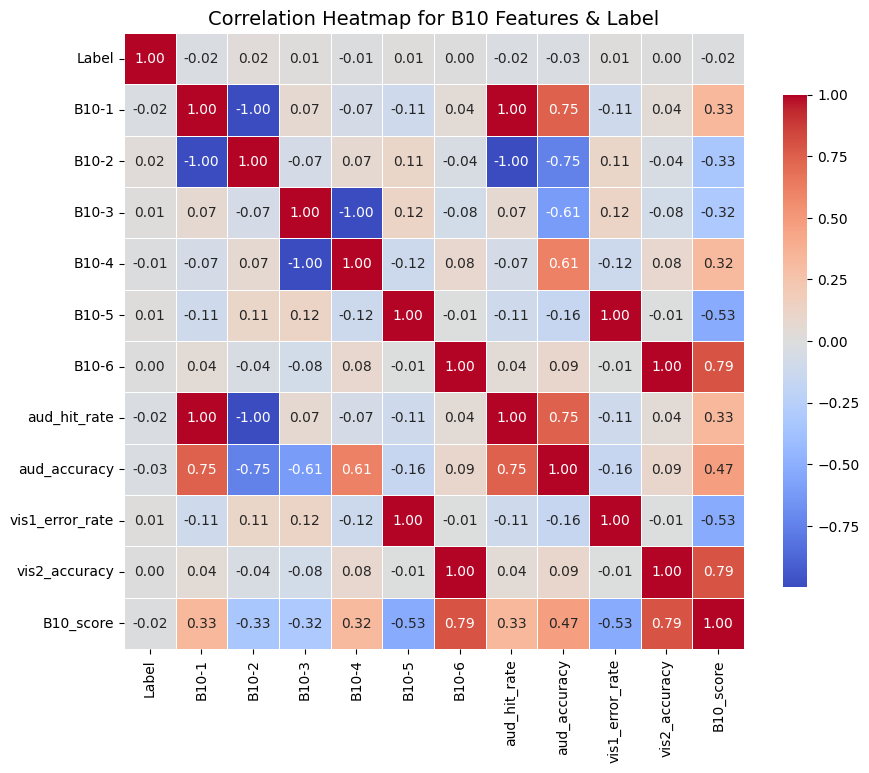

In [ ]:
corr = train_b10.corr(method='pearson')

plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', center=0,
            linewidths=0.5, cbar_kws={'shrink': 0.8})
plt.title('Correlation Heatmap for B10 Features & Label', fontsize=14)
plt.show()